# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Цель**  -  определить зависимость стоимости квартиры от разных параметров для определения рыночной стоимости жилья  

**Задачи**:
> 1. Выявить основные параметры влияния на стоимость объекта
> 2. Изучить как быстро продавались квартиры
> 3. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»
> 4. Вычислите среднюю стоимость квартир на разном удалении от центра
> 5. Рассмотреть влияние основных и косвенных парамметры по группам


**План работы**:
> 1. Изучение общей информации
> 2. Предобработка данных
> 3. Обработка пропусков
> 4. Поиск и обработка дубликатов
> 5. Приведение к корректному типу данных
> 6. Добавление новых параматеров
> 7. Исследовательский анализ данных и решение поставленых задач
> 8. Общий вывод

### Открыть файл с данными и изучить общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('/content/real_estate_data.csv',sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
pd.set_option('display.max_columns', None)
data.head(5)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0      8          NaN   False   
1             NaN          11.0         18.6      1          NaN   False   
2             NaN           5.0         34.3      4          NaN   False   
3             NaN          14.0          NaN      9          NaN   False   
4            3.03          14.0         32.0     13          NaN   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0      NaN  Санкт-Петербург           18863.0   
1      False          11.0      2.0   посёлок Шушары           12817.0   
2      False           8.3      0.0  Санкт-Петербург           21741.0   
3      False           NaN      0.0  Санкт-Петербург           28098.0   
4      False          41.0      NaN  Санкт-Петербург           31856.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   
2              13933.0               1.0           90.0               2.0   
3               6800.0               2.0           84.0               3.0   
4               8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0

Посмотрим описание каждого столбца

In [5]:
data.describe()

total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.771499   
std        5.682529  1.088701e+07     35.654083      1.078405        1.261056   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  21796.000000  23699.000000  21421.000000  12180.000000   
mean      10.673824     34.457852      5.892358     10.569807      1.150082   
std        6.597173     22.030445      4.885249      5.905438      1.071300   
min        1.000000      2.000000      1.000000      1.300000      0.000000   
25%        5.000000     18.600000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.100000      1.000000   
75%       16.000000     42.300000      8.000000     12.000000      2.000000   
max       60.000000    409.700000     33.000000    112.000000      5.000000   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
count      18157.000000         18180.000000      18181.000000    8079.000000   
mean       28793.672193         14191.277833          0.611408     490.804555   
std        12630.880622          8608.386210          0.802074     342.317995   
min            0.000000           181.000000          0.000000       1.000000   
25%        18585.000000          9238.000000          0.000000     288.000000   
50%        26726.000000         13098.500000          0.000000     455.000000   
75%        37273.000000         16293.000000          1.000000     612.000000   
max        84869.000000         65968.000000          3.000000    3190.000000   

       ponds_around3000  ponds_nearest  days_exposition  
count      18181.000000    9110.000000     20518.000000  
mean           0.770255     517.980900       180.888634  
std            0.938346     277.720643       219.727988  
min            0.000000      13.000000         1.000000  
25%            0.000000     294.000000        45.000000  
50%            1.000000     502.000000        95.000000  
75%            1.000000     729.000000       232.000000  
max            3.000000    1344.000000      1580.000000

Построим графики для всех числовых столбцов, добавим в новый df только числовые данные

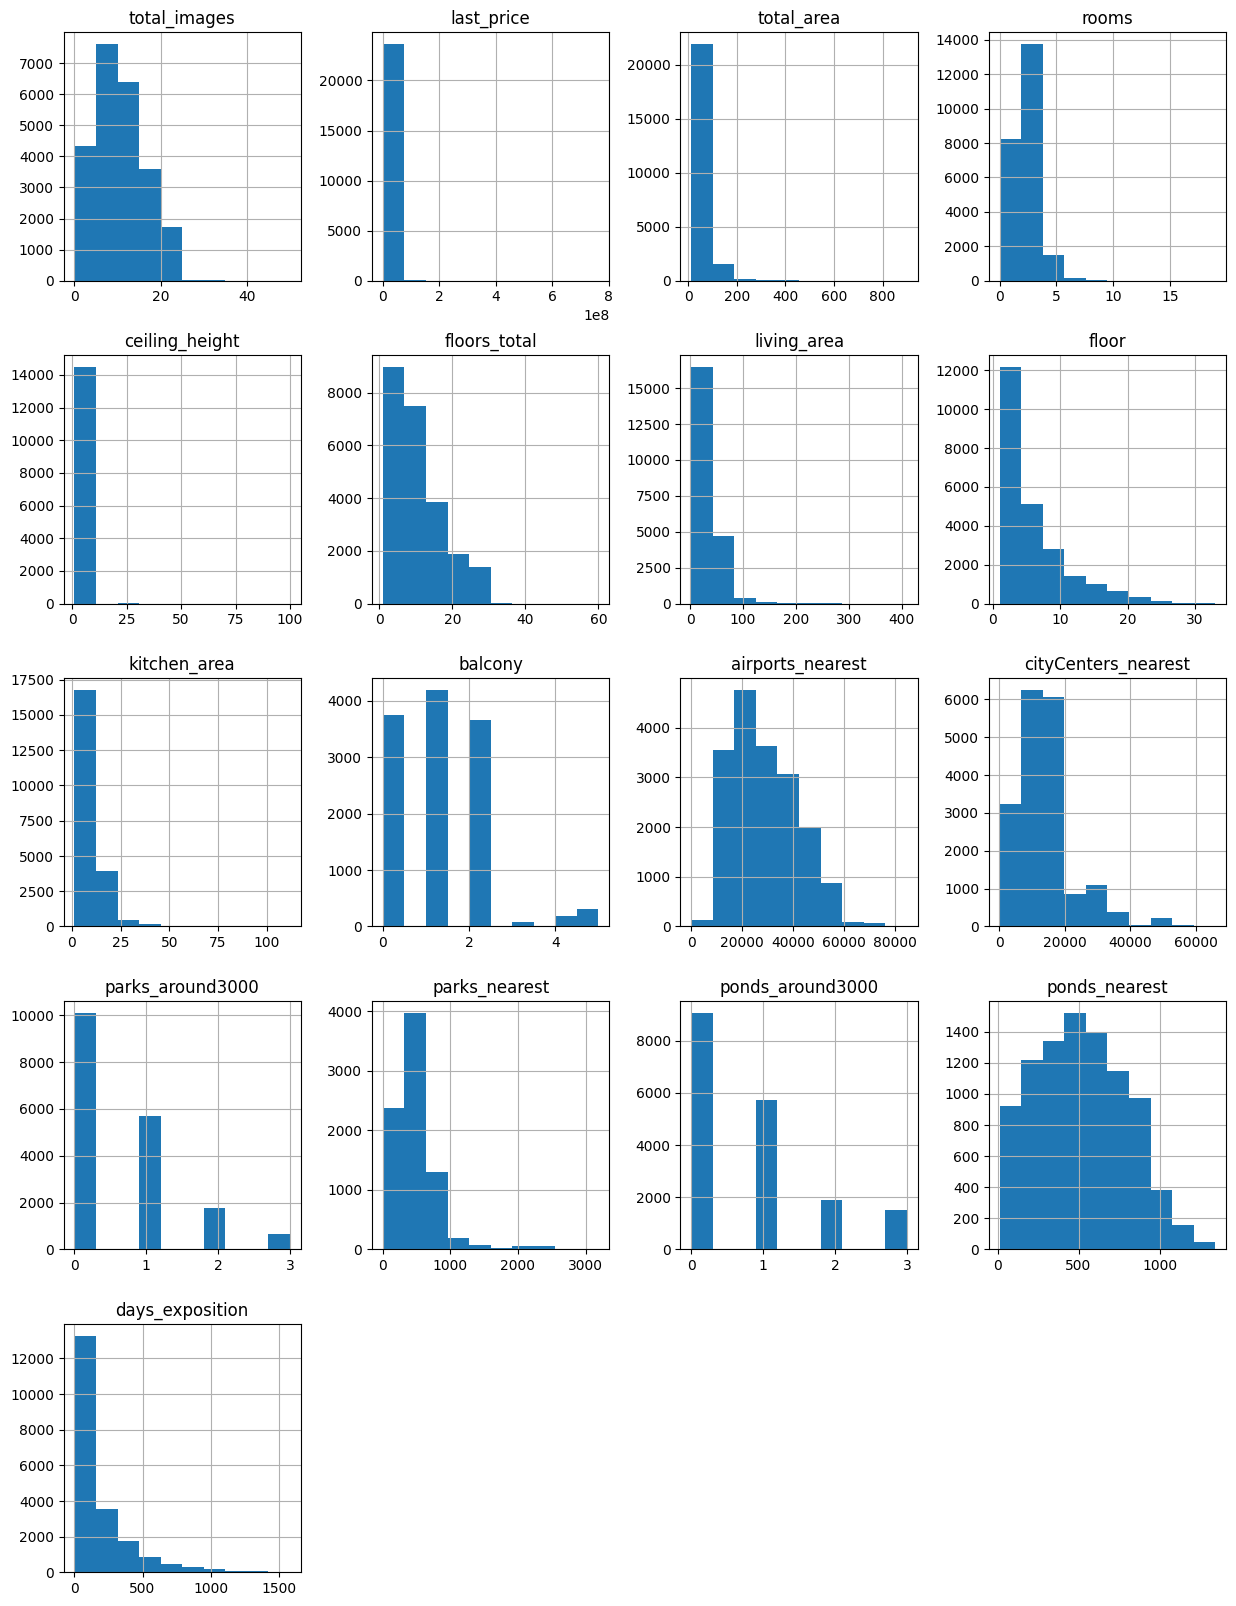

In [6]:
numeric_df = pd.DataFrame()
for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        numeric_df[col] = data[col]
numeric_df.hist(figsize=(15, 20));


##### Вывод о первичных данных

1. total_images: Очень много объявлений без фотографий. Причины могут быть разными: ошибки в загрузке изображений, технические проблемы, нежелание продавцов прикреплять фотографии к объявлению. Тип данных : int64

2. last_price: Наблюдаются аномально высокие и низкие цены. Возможно, некоторые объявления содержат ошибочные данные, выбросы или неправдоподобные цены, которые искажают статистику. Рекомендуется проверить данные на наличие ошибок, исключить выбросы и провести анализ аномальных значений для определения их подлинности. Тип данных : float64, желательно сменить на int64, поскольку копейки не будут иметь влияние на анлиз.

3. total_area: Присутствуют неправдоподобно большие значения общей площади квартир, которые могут быть вызваны ошибками ввода данных или аномальными значениями. Рекомендуется провести проверку данных на наличие ошибок и исключить аномальные значения. Тип данных : float64.

4. rooms: Наблюдаются объявления с нулевым количеством комнат, что может быть связано с ошибками ввода данных или спецификой жилья (например, квартиры-студии). Рекомендуется провести дополнительный анализ данных и исключить неправдоподобные значения.Тип данных : int64

5. ceiling_height: Встречаются аномально высокие значения высоты потолков, что может быть вызвано ошибками ввода данных или наличием нестандартных помещений. Рекомендуется проверить данные на наличие ошибок и исключить аномальные значения. Так же достаточно много пропусков, нужно заменить медианой. Тип данных : float64, лушче будут выглядить данные с 1 знаком после точки.

6. floors_total: В данных присутствуют объекты с аномально большим количеством этажей, что нехарактерно для жилых домов. Возможно, данные содержат ошибки или нестандартные объекты недвижимости. Рекомендуется провести дополнительный анализ данных и исключить неправдоподобные значения. Тип данных : float64, желательно сменить на int64, поскольку не может быть не целых этажей.

7. living_area: Наблюдаются квартиры с нулевой жилой площадью, что не соответствует реальности. Возможные причины включают ошибки ввода данных или неправдоподобные характеристики жилья. Рекомендуется провести проверку данных и исключить аномальные значения. Так же в данных достаточно большое количество пропусков, в нашем случае лучше заменить их площадью одной комнаты умноженной на количество комнат для каждой строки. Тип данных : float64.

8. floor: Присутствуют неправдоподобные значения этажей, возможно, связанные с ошибками ввода данных или нестандартным представлением этажности. Рекомендуется провести дополнительный анализ данных и исключить неправдоподобные значения. Тип данных : int64

9. kitchen_area: Наблюдаются аномально большие значения площади кухни, что может быть вызвано ошибками ввода данных или наличием нестандартных кухонь. А так же наличее нулей в столбце, возможно связанные со столбцом studio. Рекомендуется проверить данные на наличие ошибок и исключить аномальные значения. Тип данных : float64.

10.  balcony: В данных присутствуют объекты с большим количеством балконов, что может быть необычно для данного рынка. Рекомендуется провести дополнительный анализ данных и исключить неправдоподобные значения. Много пропусков которые нужно заменить. Тип данных : float64. Нужно заменить на тип int64, поскольку число балконов должно быть целым.

11. airports_nearest: Встречаются неправдоподобные значения расстояния до ближайшего аэропорта (например, 0 м), что требует дополнительного анализа. Возможно, данные содержат ошибки или аномалии, которые следует исключить и пропуски которые следует удалить.  Тип данных : float64

12. cityCenters_nearest: Гистограмма расстояния до центра города имеет большой разброс данных, возможно, связанный с разной удаленностью объектов недвижимости от центра. Рекомендуется провести анализ аномалий и исключить выбросы, имеются пропуски которые следует удалить.  Тип данных : float64.

13. parks_around3000 и ponds_around3000: Гистограммы числа парков и водоемов в радиусе 3 км выглядят нормально, но возможны аномалии или выбросы, которые следует рассмотреть отдельно. Имеются пропуски которые следует удалить. Тип данных : float64. Нужно заменить на тип int64, поскольку число парков должно быть целым.

14. parks_nearest и ponds_nearest: В данных присутствуют аномально маленькие значения расстояния до ближайших парков и водоемов, что может быть вызвано ошибками или аномалиями. Рекомендуется провести анализ данных и исключить выбросы. Имеются пропуски которые следует удалить. Тип данных : float64.

15. days_exposition: Наблюдаются аномально маленькие значения числа дней размещения объявления, что требует дополнительного анализа. Возможно, это связано с ошибками,мошенническими действиями или особенностями работы платформы. Рекомендуется провести анализ данных и исключить выбросы. Тип данных : float64. Нужно заменить на тип int64, поскольку число дней должно быть целым.

16. studio: Присутствуют пропуски  по причине  отсутствия данных , является ли объект недвижимости студией. Нужно заполнить пропуски, значением False. Тип данных : bool

17. open_plan: Отсутсвуют пропуски. Тип данных : bool

18. is_apartment: Присутствуют пропуски по причине  отсутствия данных  о том, является ли объект недвижимости апартаментами. Нужно заполнить пропуски, значением False. Тип данных : bool

19. first_day_exposition:  Отсутсвуют пропуски. Тип данных : object, нужно заменить на datetime64

20. locality_name: Присутствуют немного пропусков, возможно есть повторы, нужно проверить эти моменты

### Предобработка данных

#### Поиск и изучение пропущенныx значений в столбцах

In [7]:
column_df = pd.DataFrame()
column_df['column_name'] = data.columns
column_df['non-null_values'] = [data[col].count() for col in data.columns]
column_df['NaN'] = [data[col].isnull().sum() for col in data.columns]
column_df_in = column_df.sort_values('NaN',ascending=False).reset_index(drop=True)
column_df_in.head(2)

column_name  non-null_values    NaN
0   is_apartment             2775  20924
1  parks_nearest             8079  15620

Просмотрим уникальные значения для каждого столбца

In [8]:
unique_df = pd.DataFrame()
unique_df['column_name'] = data.columns
unique_df['unique_count'] = [data[col].nunique() for col in data.columns]
unique_df['unique_values'] = [data[col].unique() for col in data.columns]
unique_df.sort_values('unique_count', inplace=True)
unique_df_in = unique_df.reset_index(drop=True)
unique_df_in.head(2)

column_name  unique_count  unique_values
0      studio             2  [False, True]
1   open_plan             2  [False, True]

##### Вывод о наличии пропусков

Всего в таблице представлены 23698 строк, из них больше всего пропусков в колонке

is_apartment - 20924 пропусков (категориальные значения),

parks_nearest - 15620 пропусков (колличественные значения),

ponds_nearest - 14589 пропусков (колличественные значения),

balcony - 11519 пропусков (колличественные значения).

#### Обработка пропусков

In [9]:
old_df = data.copy()

В строках *airports_nearesе, cityCenters_nearest, parks_nearest, ponds_nearest,* достаточно много пропусков вызванных ошибкой программы и в случае парков и водоемов отсутвие значений результат отсутвие значений в других столбцах. По этому создадим столбецы с категориями для *parks_nearest, ponds_nearest* в них заполним все пропуски значением "неизвестно".

In [10]:
# Функция для определения категории
def categorize(distance):
    if pd.isnull(distance):
        return 'неизвестно'
    distance = float(distance)
    if distance <= 200:
        return 'очень близко'
    elif 200 < distance <= 500:
        return 'близко'
    elif 500 < distance <= 1000:
        return 'пешая доступность'
    elif distance >= 2200:
        return 'исключение'
    else:
        return 'далеко'

# Создание столбцов с категориями для parks_nearest и ponds_nearest
data['parks_nearest_category'] = data['parks_nearest'].apply(categorize)
data['ponds_nearest_category'] = data['ponds_nearest'].apply(categorize)


In [11]:
value_counts = data['parks_nearest_category'].value_counts().sort_index()
print("Количество значений в каждой группе:")
value_counts

Количество значений в каждой группе:


parks_nearest_category
близко                3476
далеко                 305
исключение              72
неизвестно           15620
очень близко          1224
пешая доступность     3002
Name: count, dtype: int64

In [12]:
value_counts = data['ponds_nearest_category'].value_counts().sort_index()
print("Количество значений в каждой группе:")
value_counts

Количество значений в каждой группе:


ponds_nearest_category
близко                3163
далеко                 350
неизвестно           14589
очень близко          1366
пешая доступность     4231
Name: count, dtype: int64

###### check nan

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_images            23699 non-null  int64  
 1   last_price              23699 non-null  float64
 2   total_area              23699 non-null  float64
 3   first_day_exposition    23699 non-null  object 
 4   rooms                   23699 non-null  int64  
 5   ceiling_height          14504 non-null  float64
 6   floors_total            23613 non-null  float64
 7   living_area             21796 non-null  float64
 8   floor                   23699 non-null  int64  
 9   is_apartment            2775 non-null   object 
 10  studio                  23699 non-null  bool   
 11  open_plan               23699 non-null  bool   
 12  kitchen_area            21421 non-null  float64
 13  balcony                 12180 non-null  float64
 14  locality_name           23650 non-null

Удаляем строки с пропусками в *floors_total*, поскольку их не много и нельзя заменить средним значением, поскольку квартира может находится на этаже выше среднего, в данном случае замена может ухудшить данные.

In [14]:
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'] = data['floors_total'].astype(int)
data.isna().sum()

total_images                  0
last_price                    0
total_area                    0
first_day_exposition          0
rooms                         0
ceiling_height             9118
floors_total                  0
living_area                1870
floor                         0
is_apartment              20838
studio                        0
open_plan                     0
kitchen_area               2231
balcony                   11480
locality_name                48
airports_nearest           5532
cityCenters_nearest        5509
parks_around3000           5508
parks_nearest             15568
ponds_around3000           5508
ponds_nearest             14552
days_exposition            3172
parks_nearest_category        0
ponds_nearest_category        0
dtype: int64

##### Замена пропущенных значений  

В данных пресутсвует явная проблема со столбцом 'is_apartment', в значениях которого слишком много пропусков. Начнем с него. Попробуем вывести только строки со значением True

In [15]:
is_apartment = data[data['is_apartment'] == True]
pd.set_option('display.max_columns', None)

is_apartment.head(2)

total_images  last_price  total_area first_day_exposition  rooms  \
543            11  12790000.0        56.6  2018-11-06T00:00:00      2   
916            11   8183000.0        70.0  2018-01-11T00:00:00      2   

     ceiling_height  floors_total  living_area  floor is_apartment  studio  \
543            3.50             3         29.4      1         True   False   
916            3.12             3         40.0      3         True   False   

     open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
543      False           NaN      NaN         Петергоф           35248.0   
916      False           NaN      2.0  Санкт-Петербург           45796.0   

     cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
543              30437.0               3.0           53.0               3.0   
916              21729.0               0.0            NaN               1.0   

     ponds_nearest  days_exposition parks_nearest_category  \
543           22.0              NaN           очень близко   
916          754.0            179.0             неизвестно   

    ponds_nearest_category  
543           очень близко  
916      пешая доступность

In [16]:
is_apartment_count = data[data['is_apartment'] == True]['is_apartment'].count()
is_apartment_count

50

Строк со значением True всего 30 это примерно 0,2 % на 23698 квартир, допустим что пользователи вводили данные об аппартаментах в том случае когда объявление было об апартаментах, в другом случае пропускали эти данные. Следовательно, заменим все пропуски на False

In [17]:
# Заменим значения NaN в столбце 'is_apartment'
data['is_apartment'] = data['is_apartment'].fillna(False)
data.head()

<ipython-input-17-ffd4e9e790bd>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_apartment'] = data['is_apartment'].fillna(False)


total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70            16         51.0      8         False   False   
1             NaN            11         18.6      1         False   False   
2             NaN             5         34.3      4         False   False   
3             NaN            14          NaN      9         False   False   
4            3.03            14         32.0     13         False   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0      NaN  Санкт-Петербург           18863.0   
1      False          11.0      2.0   посёлок Шушары           12817.0   
2      False           8.3      0.0  Санкт-Петербург           21741.0   
3      False           NaN      0.0  Санкт-Петербург           28098.0   
4      False          41.0      NaN  Санкт-Петербург           31856.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   
2              13933.0               1.0           90.0               2.0   
3               6800.0               2.0           84.0               3.0   
4               8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition parks_nearest_category  \
0          755.0              NaN                 близко   
1            NaN             81.0             неизвестно   
2          574.0            558.0           очень близко   
3          234.0            424.0           очень близко   
4           48.0            121.0           очень близко   

  ponds_nearest_category  
0      пешая доступность  
1             неизвестно  
2      пешая доступность  
3                 близко  
4           очень близко

In [18]:
print(data.isna().sum())

total_images                  0
last_price                    0
total_area                    0
first_day_exposition          0
rooms                         0
ceiling_height             9118
floors_total                  0
living_area                1870
floor                         0
is_apartment                  0
studio                        0
open_plan                     0
kitchen_area               2231
balcony                   11480
locality_name                48
airports_nearest           5532
cityCenters_nearest        5509
parks_around3000           5508
parks_nearest             15568
ponds_around3000           5508
ponds_nearest             14552
days_exposition            3172
parks_nearest_category        0
ponds_nearest_category        0
dtype: int64


Аналогичную обработку производим со столбцом *balcony* и *ceiling_height*, поскольку NaN в них по причине пропуска в объявлении при заполнении от пользователей, так что заполним все пропуски в balcony - 0(скорее всего пропуск по причине отсутствия балкона), а в *'ceiling_height'* - медианой (возможно не указали в типовых домах или со стандартными потолками). Преобразуем *balcony* к типу int

In [19]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype(int)
data.head(2)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0             2.7            16         51.0      8         False   False   
1             NaN            11         18.6      1         False   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0        0  Санкт-Петербург           18863.0   
1      False          11.0        2   посёлок Шушары           12817.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   

   ponds_nearest  days_exposition parks_nearest_category  \
0          755.0              NaN                 близко   
1            NaN             81.0             неизвестно   

  ponds_nearest_category  
0      пешая доступность  
1             неизвестно

In [20]:
data['ceiling_height'].describe()

count    14495.000000
mean         2.771495
std          1.261445
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Распределим высотность потолков по удаленности от центра города, преположительно в центре города(исторические районы), высота потолков выше. Заменем значения типа 25 на 2.5

In [21]:
bins = [0, 2000, 4000, 6000, 8000, 12000, 20000, 50000, float('inf')]
group_names = ['До 2 км', '2-4 км', '4-6 км', '6-8 км', '8-12 км', '12-20 км', '20-50 км', 'более 50 км']
data['distance_group_city'] = pd.cut(data['cityCenters_nearest'], bins=bins, labels=group_names, right=False)
data['distance_group_city'] = data['distance_group_city'].cat.add_categories('Неизвестно')
data['distance_group_city'] = data['distance_group_city'].fillna('Неизвестно')

value_counts = data['distance_group_city'].value_counts().sort_index()
print("Количество значений в каждой группе:")
value_counts

Количество значений в каждой группе:


distance_group_city
До 2 км         328
2-4 км          835
4-6 км         1681
6-8 км          877
8-12 км        3680
12-20 км       8088
20-50 км       2429
более 50 км     186
Неизвестно     5509
Name: count, dtype: int64

In [22]:
median_ceiling_height = data.groupby('distance_group_city')['ceiling_height'].median()
for group, median in median_ceiling_height.items():
    data.loc[(data['distance_group_city'] == group) & (data['ceiling_height'].isnull()), 'ceiling_height'] = median

data.loc[(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 50), 'ceiling_height'] = data['ceiling_height']/ 10

data = data.query( "2 < ceiling_height < 5")
data.head(2)

<ipython-input-22-6a24167652d5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_ceiling_height = data.groupby('distance_group_city')['ceiling_height'].median()


total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0             2.7            16         51.0      8         False   False   
1             2.6            11         18.6      1         False   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0        0  Санкт-Петербург           18863.0   
1      False          11.0        2   посёлок Шушары           12817.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   

   ponds_nearest  days_exposition parks_nearest_category  \
0          755.0              NaN                 близко   
1            NaN             81.0             неизвестно   

  ponds_nearest_category distance_group_city  
0      пешая доступность            12-20 км  
1             неизвестно            12-20 км

In [23]:
data.describe()

total_images    last_price    total_area         rooms  ceiling_height  \
count  23583.000000  2.358300e+04  23583.000000  23583.000000    23583.000000   
mean       9.874104  6.525563e+06     60.309974      2.071111        2.702367   
std        5.679699  1.082571e+07     35.517220      1.077872        0.232869   
min        0.000000  1.219000e+04     12.000000      0.000000        2.200000   
25%        6.000000  3.405500e+06     40.000000      1.000000        2.600000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.600000   
75%       14.000000  6.799000e+06     69.800000      3.000000        2.750000   
max       50.000000  7.630000e+08    900.000000     19.000000        4.900000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23583.000000  21718.000000  23583.000000  21360.000000  23583.000000   
mean      10.675317     34.447304      5.877497     10.561659      0.592927   
std        6.596186     21.986372      4.874626      5.893975      0.959755   
min        1.000000      2.000000      1.000000      1.300000      0.000000   
25%        5.000000     18.600000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.100000      0.000000   
75%       16.000000     42.300000      8.000000     12.000000      1.000000   
max       60.000000    409.700000     33.000000    112.000000      5.000000   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
count      18062.000000         18085.000000      18086.000000    8032.000000   
mean       28791.011239         14188.073652          0.610804     490.622385   
std        12630.278622          8615.094086          0.801624     341.494636   
min            0.000000           181.000000          0.000000       1.000000   
25%        18574.000000          9234.000000          0.000000     288.000000   
50%        26732.500000         13094.000000          0.000000     455.000000   
75%        37250.000000         16293.000000          1.000000     612.000000   
max        84869.000000         65968.000000          3.000000    3190.000000   

       ponds_around3000  ponds_nearest  days_exposition  
count      18086.000000    9048.000000     20417.000000  
mean           0.769711     518.387710       180.884998  
std            0.938880     277.871244       219.708458  
min            0.000000      13.000000         1.000000  
25%            0.000000     294.000000        45.000000  
50%            1.000000     503.000000        95.000000  
75%            1.000000     730.000000       232.000000  
max            3.000000    1344.000000      1580.000000

In [24]:
print(data.isna().sum())

total_images                  0
last_price                    0
total_area                    0
first_day_exposition          0
rooms                         0
ceiling_height                0
floors_total                  0
living_area                1865
floor                         0
is_apartment                  0
studio                        0
open_plan                     0
kitchen_area               2223
balcony                       0
locality_name                48
airports_nearest           5521
cityCenters_nearest        5498
parks_around3000           5497
parks_nearest             15551
ponds_around3000           5497
ponds_nearest             14535
days_exposition            3166
parks_nearest_category        0
ponds_nearest_category        0
distance_group_city           0
dtype: int64


Оставляем пропуски в *living_area* и* kitchen_area*, поскольку есть сложность корректно заполнить эти пропуски из-за отсутствие данных о не жилых помещениях квартир (санузлы и тд). В данном проекте наличие пропусков, не должно повлиять на конечный результат.


Предполагается, что значение столбца *studio* может влиять на значение столбца
*kitchen_area*, поскольку в студии кухня и жилая площадь находятся в одном помещении и разграничиваются только мокрой зоной, кухонного помещения в привычном понимании нет. Следовательно, логично предположить, что значение *kitchen_area* для студий должно быть равно нулю. Проведем проверку данного утверждения и заменим пропущенные значения соответственно.

In [25]:
data.loc[data['studio'] == True].count()

total_images              145
last_price                145
total_area                145
first_day_exposition      145
rooms                     145
ceiling_height            145
floors_total              145
living_area               138
floor                     145
is_apartment              145
studio                    145
open_plan                 145
kitchen_area                0
balcony                   145
locality_name             145
airports_nearest           90
cityCenters_nearest        90
parks_around3000           90
parks_nearest              19
ponds_around3000           90
ponds_nearest              49
days_exposition           131
parks_nearest_category    145
ponds_nearest_category    145
distance_group_city       145
dtype: int64

Действительно, для *kitchen_area* нет данных при '*studio*' == *True*, заменим значения нулем:

In [26]:
data.loc[(data['kitchen_area'].isna()) & (data['studio'] == True), 'kitchen_area'] = 0
data.loc[data['studio'] == True].head(2)

total_images  last_price  total_area first_day_exposition  rooms  \
144             1   2450000.0       27.00  2017-03-30T00:00:00      0   
440             8   2480000.0       27.11  2018-03-12T00:00:00      0   

     ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
144             2.6            24        15.50      2         False    True   
440             2.6            17        24.75      4         False    True   

     open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
144      False           0.0        2   посёлок Мурино               NaN   
440      False           0.0        2  Санкт-Петербург           38171.0   

     cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
144                  NaN               NaN            NaN               NaN   
440              15015.0               0.0            NaN               2.0   

     ponds_nearest  days_exposition parks_nearest_category  \
144            NaN            181.0             неизвестно   
440          982.0             64.0             неизвестно   

    ponds_nearest_category distance_group_city  
144             неизвестно          Неизвестно  
440      пешая доступность            12-20 км

In [27]:
print(data.isna().sum())

total_images                  0
last_price                    0
total_area                    0
first_day_exposition          0
rooms                         0
ceiling_height                0
floors_total                  0
living_area                1865
floor                         0
is_apartment                  0
studio                        0
open_plan                     0
kitchen_area               2078
balcony                       0
locality_name                48
airports_nearest           5521
cityCenters_nearest        5498
parks_around3000           5497
parks_nearest             15551
ponds_around3000           5497
ponds_nearest             14535
days_exposition            3166
parks_nearest_category        0
ponds_nearest_category        0
distance_group_city           0
dtype: int64


In [28]:
bins = [12, 20, 40, 50, 70, 250, 901 ]
group_names = ['Исключение min','Эконом', 'Комфорт',
               'Бизнес', 'Премиум','Исключение max']
data['group_total_area'] = pd.cut(data['total_area'], bins=bins,
                                  labels=group_names, right=False)
value_counts = data['group_total_area'].value_counts().sort_index()
print("Количество значений в каждой группе:")
value_counts

Количество значений в каждой группе:


group_total_area
Исключение min      27
Эконом            5662
Комфорт           5197
Бизнес            6810
Премиум           5775
Исключение max     112
Name: count, dtype: int64

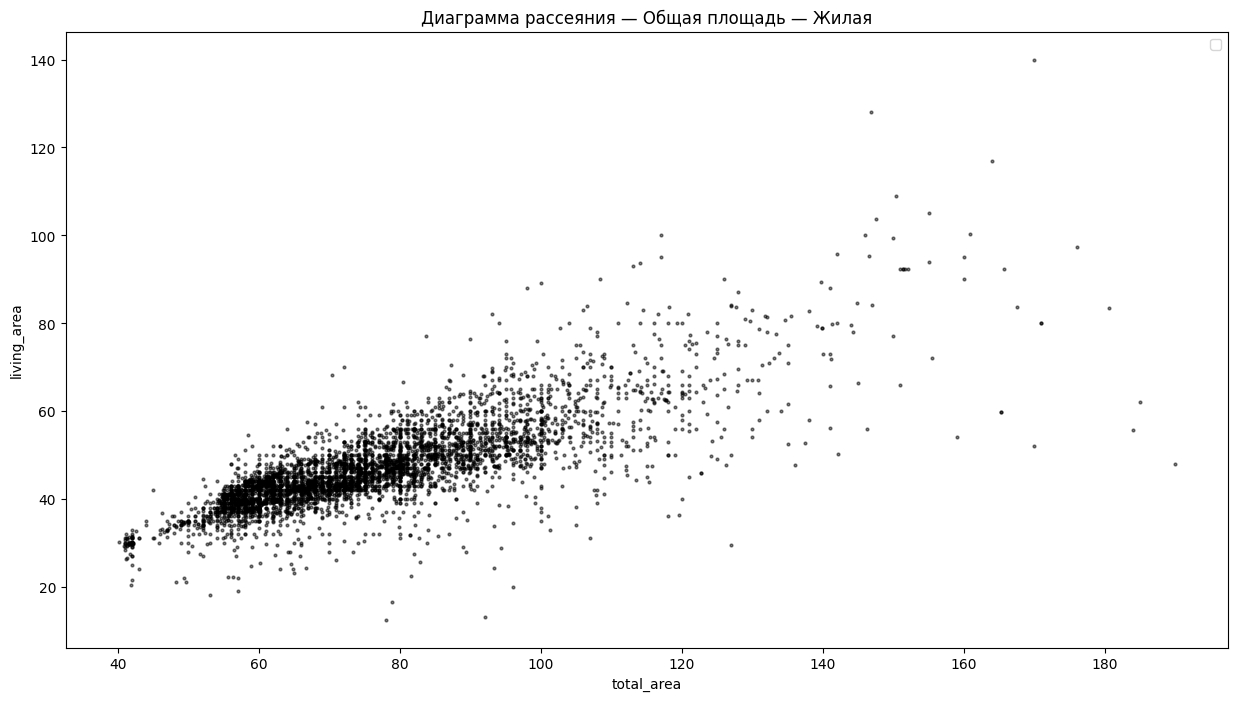

In [29]:
data[data['rooms'] == 3].query(
    'total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5,
        subplots=True, figsize=(15,8), c = 'black', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');

In [30]:
print(data.isna().sum())

total_images                  0
last_price                    0
total_area                    0
first_day_exposition          0
rooms                         0
ceiling_height                0
floors_total                  0
living_area                1865
floor                         0
is_apartment                  0
studio                        0
open_plan                     0
kitchen_area               2078
balcony                       0
locality_name                48
airports_nearest           5521
cityCenters_nearest        5498
parks_around3000           5497
parks_nearest             15551
ponds_around3000           5497
ponds_nearest             14535
days_exposition            3166
parks_nearest_category        0
ponds_nearest_category        0
distance_group_city           0
group_total_area              0
dtype: int64


In [31]:
data[data['locality_name'].isna()].head(2)

total_images  last_price  total_area first_day_exposition  rooms  \
1097             3   8600000.0        81.7  2016-04-15T00:00:00      3   
2033             6   5398000.0        80.0  2017-05-30T00:00:00      3   

      ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
1097            3.55             5         50.8      2         False   False   
2033            2.60             4         42.6      2         False   False   

      open_plan  kitchen_area  balcony locality_name  airports_nearest  \
1097      False           8.8        0           NaN           23478.0   
2033      False          18.6        0           NaN               NaN   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
1097               4258.0               0.0            NaN               0.0   
2033                  NaN               NaN            NaN               NaN   

      ponds_nearest  days_exposition parks_nearest_category  \
1097            NaN            147.0             неизвестно   
2033            NaN             34.0             неизвестно   

     ponds_nearest_category distance_group_city group_total_area  
1097             неизвестно              4-6 км          Премиум  
2033             неизвестно          Неизвестно          Премиум

Пользователь возможно не указал адрес, поэтому в столбце *locality_name* имеются пропуски. Заменим эти пропуски на значение "Санкт-Петербург", так как по описанию данных, квартиры либо находятся в Санкт-Петербурге, либо находятся недалеко от него

In [32]:
data['locality_name'] = data['locality_name'].fillna('Санкт-Петербург')
nan = data['locality_name'].isnull().sum()
print('Количество пропусков:',nan)
data['locality_name'].value_counts().head(10)

Количество пропусков: 0


locality_name
Санкт-Петербург      15682
посёлок Мурино         520
посёлок Шушары         439
Всеволожск             397
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 235
Name: count, dtype: int64

In [33]:
data.isna().sum()

total_images                  0
last_price                    0
total_area                    0
first_day_exposition          0
rooms                         0
ceiling_height                0
floors_total                  0
living_area                1865
floor                         0
is_apartment                  0
studio                        0
open_plan                     0
kitchen_area               2078
balcony                       0
locality_name                 0
airports_nearest           5521
cityCenters_nearest        5498
parks_around3000           5497
parks_nearest             15551
ponds_around3000           5497
ponds_nearest             14535
days_exposition            3166
parks_nearest_category        0
ponds_nearest_category        0
distance_group_city           0
group_total_area              0
dtype: int64

In [34]:
data.head(2)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0             2.7            16         51.0      8         False   False   
1             2.6            11         18.6      1         False   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0        0  Санкт-Петербург           18863.0   
1      False          11.0        2   посёлок Шушары           12817.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   

   ponds_nearest  days_exposition parks_nearest_category  \
0          755.0              NaN                 близко   
1            NaN             81.0             неизвестно   

  ponds_nearest_category distance_group_city group_total_area  
0      пешая доступность            12-20 км          Премиум  
1             неизвестно            12-20 км          Комфорт

Заменим пропуски в *parks_around3000* и *ponds_around3000* нулем, поскольку наличие пропуска может говорить об отсутсвии парка или водоема в радиусе 3 км

In [35]:
data['parks_around3000'].describe()

count    18086.000000
mean         0.610804
std          0.801624
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

In [36]:
data['ponds_around3000'].describe()

count    18086.000000
mean         0.769711
std          0.938880
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

In [37]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [38]:
data['parks_around3000'].describe()

count    23583.000000
mean         0.468431
std          0.748001
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

In [39]:
data['ponds_around3000'].describe()

count    23583.000000
mean         0.590298
std          0.884268
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

In [40]:
data['days_exposition'].describe()

count    20417.000000
mean       180.884998
std        219.708458
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

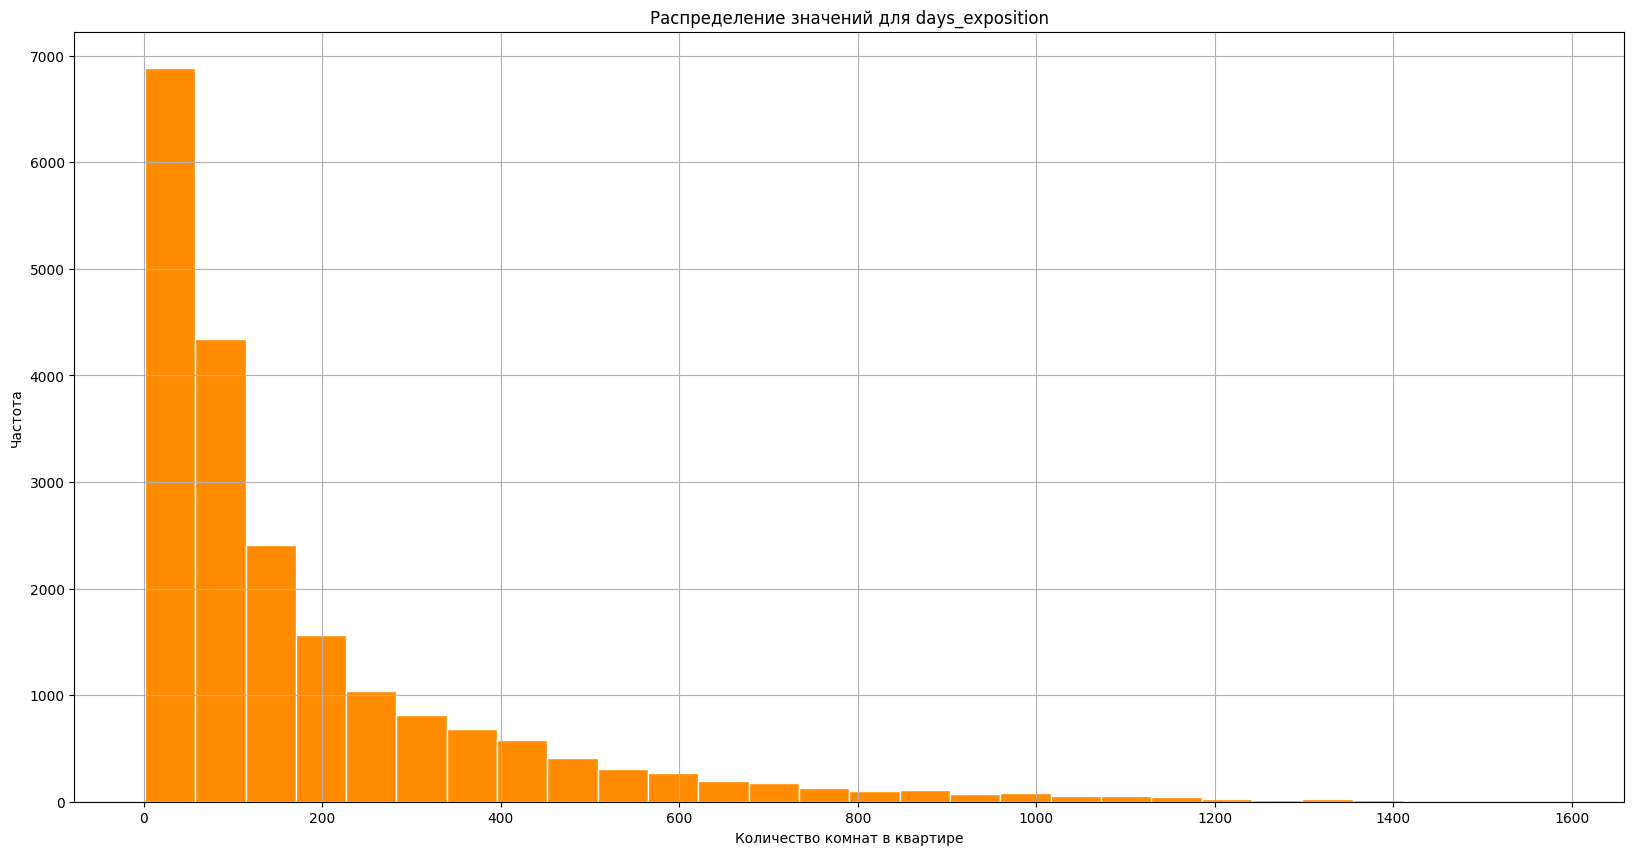

In [41]:
data.days_exposition.hist(figsize=(20,10), bins=28, color='#FF8C00', ec="white")
plt.title('Распределение значений для days_exposition')
plt.xlabel('Количество комнат в квартире')
plt.ylabel('Частота')
plt.show()

In [42]:
bins = [0, 3, 45, 95, 230, 1000, 1580]
group_names_days = ['0-3','3-45', '45-95', '95-230','230-1000','1000-1600']
data['group_days_exposition'] = pd.cut(data['days_exposition'], bins=bins, labels=group_names_days, right=False)
data['group_days_exposition'] = data['group_days_exposition'].cat.add_categories('Не продано')
data['group_days_exposition'] = data['group_days_exposition'].fillna('Не продано')

value_counts = data['group_days_exposition'].value_counts().sort_index()
print("Количество значений в каждой группе:")
value_counts

Количество значений в каждой группе:


group_days_exposition
0-3              4
3-45          5064
45-95         5087
95-230        5115
230-1000      4871
1000-1600      275
Не продано    3167
Name: count, dtype: int64

In [43]:
data['group_days_exposition']

0        Не продано
1             45-95
2          230-1000
3          230-1000
4            95-230
            ...    
23694    Не продано
23695         45-95
23696    Не продано
23697      230-1000
23698    Не продано
Name: group_days_exposition, Length: 23583, dtype: category
Categories (7, object): ['0-3' < '3-45' < '45-95' < '95-230' < '230-1000' < '1000-1600' <
                         'Не продано']

##### Вывод о замене пропущенных значений

Были заменены значения в столбцах'*days_exposition*','*locality_name*', '*kitchen_area*', '*ceiling_height*', '*balcony*', '*is_apartment*', *parks_around3000* и *ponds_around3000*  а так же создан новый столбец *group_total_area* с категориями по столбцу '*total_area*',  столбец '*distance_group*' с категориями по столбцу '*cityCenters_nearest*' и столбец '*group_days_exposition*' с категориями по столбцу '*days_exposition*'.

#### Поиск и обработка дубликатов

In [44]:
duplct = data.duplicated().sum()
duplct

0

Поскольку явные дубликаты отсутсвуют, посмотрим на уникальные значения и заменим неявные дубликаты в столбце '*locality_name*' на один формат

In [45]:
df = data['locality_name'].unique()
df.sort()
df

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [46]:
duplicates = data['locality_name'].nunique()
'Колличество уникальных значений до обработки',duplicates

('Колличество уникальных значений до обработки', 364)

In [47]:
def process_and_remove_duplicates(df, column_name):
    df[column_name] = df[column_name].str.lower()
    df[column_name] = df[column_name].str.replace('поселок', 'посёлок')
    df[column_name] = df[column_name].str.replace('городского типа', '')
    df[column_name] = df[column_name].str.replace('городской посёлок','посёлок')
    df[column_name] = df[column_name].str.replace('  ', ' ')
    df[column_name] = df[column_name].str.strip()
    return df

In [48]:
data = process_and_remove_duplicates(data, 'locality_name')
data.head(2)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0             2.7            16         51.0      8         False   False   
1             2.6            11         18.6      1         False   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0        0  санкт-петербург           18863.0   
1      False          11.0        2   посёлок шушары           12817.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   

   ponds_nearest  days_exposition parks_nearest_category  \
0          755.0              NaN                 близко   
1            NaN             81.0             неизвестно   

  ponds_nearest_category distance_group_city group_total_area  \
0      пешая доступность            12-20 км          Премиум   
1             неизвестно            12-20 км          Комфорт   

  group_days_exposition  
0            Не продано  
1                 45-95

In [49]:
duplicates_n = data['locality_name'].nunique()
'Колличество уникальных значений после обработки', duplicates_n

('Колличество уникальных значений после обработки', 322)

На 42 уникальных значений меньше, неявные дубликаты отредактированы, населенные пункты типа 'деревня Кудрово' и 'Кудрово' объеденять не стоит, поскольку это скорее всего разные населенные пункты, Кудрово без обозначения может быть селом или городом, в данном случае в нашей таблице без обозначения типа населенного пункта, только города, значит скорее всего это город.

##### check name

In [50]:
# check
data.locality_name.unique()

array(['санкт-петербург', 'посёлок шушары', 'посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'посёлок красный бор', 'гатчина', 'деревня фёдоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'посёлок металлострой', 'посёлок лебяжье', 'посёлок сиверский',
       'посёлок молодцово', 'посёлок кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'посёлок ефимовский', 'посёлок плодовое', 'деревня заклинье',
       'посёлок торковичи', 'посёлок первомайское', 'красное село',
       'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'посёлок новый свет', 'сланцы',
       'село путилово', 'ивангород', 'мурино', 'шлиссельбург',
       'никольское', 'зелено

#### Приведение к корректному типу данных.

Данные в столбце '*living_area*' имеют более одного знака после точки, что в нашем случае не обязательно. Исправим этот момент

In [51]:
data['living_area'] = data['living_area'].round(1)
data.head(2)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0             2.7            16         51.0      8         False   False   
1             2.6            11         18.6      1         False   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0        0  санкт-петербург           18863.0   
1      False          11.0        2   посёлок шушары           12817.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   

   ponds_nearest  days_exposition parks_nearest_category  \
0          755.0              NaN                 близко   
1            NaN             81.0             неизвестно   

  ponds_nearest_category distance_group_city group_total_area  \
0      пешая доступность            12-20 км          Премиум   
1             неизвестно            12-20 км          Комфорт   

  group_days_exposition  
0            Не продано  
1                 45-95

Приведем столбец *first_day_exposition* к более читабильному формату, поскольку неуказаны часы минуты и секунды публикации, эти данные нам не нужны

In [52]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

data.head(2)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0             2.7            16         51.0      8         False   False   
1             2.6            11         18.6      1         False   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0        0  санкт-петербург           18863.0   
1      False          11.0        2   посёлок шушары           12817.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   

   ponds_nearest  days_exposition parks_nearest_category  \
0          755.0              NaN                 близко   
1            NaN             81.0             неизвестно   

  ponds_nearest_category distance_group_city group_total_area  \
0      пешая доступность            12-20 км          Премиум   
1             неизвестно            12-20 км          Комфорт   

  group_days_exposition  
0            Не продано  
1                 45-95

Преобразуем parks_around3000, ponds_around3000 и в тип данных int

In [53]:
columns = ['parks_around3000', 'ponds_around3000']

for col in columns:
    data[col] = data[col].astype(int)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23583 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23583 non-null  int64         
 1   last_price              23583 non-null  float64       
 2   total_area              23583 non-null  float64       
 3   first_day_exposition    23583 non-null  datetime64[ns]
 4   rooms                   23583 non-null  int64         
 5   ceiling_height          23583 non-null  float64       
 6   floors_total            23583 non-null  int64         
 7   living_area             21718 non-null  float64       
 8   floor                   23583 non-null  int64         
 9   is_apartment            23583 non-null  bool          
 10  studio                  23583 non-null  bool          
 11  open_plan               23583 non-null  bool          
 12  kitchen_area            21505 non-null  float64    

##### Выводы предобработка данных

Столбцы за исключением *parks_nearest*, *ponds_nearest*, *days_exposition*, *airports_nearest*, *cityCenters_nearest*,  *kitchen_area*, *living_area* не имеют пропусков, в этих случаях были созданы категории, так же были найдены и обработаны дубликаты в *locality_name*, все столбцы приведены к корректному типу данных, где это было не обходимо

### Добавление в таблицу новых столбцев

Что бы корректней исследовать dataframe добавим несколько важных коллонок:

Добавим день недели, месяц, год публикации объявления

In [55]:
data['first_exposition_day_of_week'] = data['first_day_exposition'].dt.weekday
data['first_exposition_month'] = data['first_day_exposition'].dt.month
data['first_exposition_year'] = data['first_day_exposition'].dt.year

data.head(2)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0             2.7            16         51.0      8         False   False   
1             2.6            11         18.6      1         False   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0        0  санкт-петербург           18863.0   
1      False          11.0        2   посёлок шушары           12817.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0                 1          482.0                 2   
1              18603.0                 0            NaN                 0   

   ponds_nearest  days_exposition parks_nearest_category  \
0          755.0              NaN                 близко   
1            NaN             81.0             неизвестно   

  ponds_nearest_category distance_group_city group_total_area  \
0      пешая доступность            12-20 км          Премиум   
1             неизвестно            12-20 км          Комфорт   

  group_days_exposition  first_exposition_day_of_week  first_exposition_month  \
0            Не продано                             3                       3   
1                 45-95                             1                      12   

   first_exposition_year  
0                   2019  
1                   2018

In [56]:
fl2 = data[['floor', 'floors_total']]
fl2 = fl2[fl2['floor'] == 0]
fl2

Empty DataFrame
Columns: [floor, floors_total]
Index: []

Добавим новую колонку с группами этажей

In [57]:
def categorize_floors(data):
    condition_first = (data['floor'] > 0) & (data['floors_total'] > 0) & (data['floor'] == 1)
    condition_last = (data['floor'] > 0) & (data['floors_total'] > 0) & (data['floor'] == data['floors_total']) & (data['floor'] != 1)
    data['type_floor'] = np.select(
        [condition_first, condition_last],
        ['первый', 'последний'],
        default='другой'
    )

    return data

In [58]:
data = categorize_floors(data)
result = data.loc[data['floor'] == 1, 'type_floor'].value_counts()
result

type_floor
первый    2909
Name: count, dtype: int64

Добавим новую колонку с расстоянием до центра города в километрах.

In [59]:
data['km_cityCenters_nearest'] = (data['cityCenters_nearest']/1000).round(0)

Добавим столбец с ценой за квадртный метр

In [60]:
data['price_per_area'] = data['last_price']/data['total_area']

data['price_per_area'] = data['price_per_area'].round(2)
data['price_per_area'].head()

0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
Name: price_per_area, dtype: float64

In [61]:
 data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70            16         51.0      8         False   False   
1            2.60            11         18.6      1         False   False   
2            2.60             5         34.3      4         False   False   
3            2.86            14          NaN      9         False   False   
4            3.03            14         32.0     13         False   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0        0  санкт-петербург           18863.0   
1      False          11.0        2   посёлок шушары           12817.0   
2      False           8.3        0  санкт-петербург           21741.0   
3      False           NaN        0  санкт-петербург           28098.0   
4      False          41.0        0  санкт-петербург           31856.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0                 1          482.0                 2   
1              18603.0                 0            NaN                 0   
2              13933.0                 1           90.0                 2   
3               6800.0                 2           84.0                 3   
4               8098.0                 2          112.0                 1   

   ponds_nearest  days_exposition parks_nearest_category  \
0          755.0              NaN                 близко   
1            NaN             81.0             неизвестно   
2          574.0            558.0           очень близко   
3          234.0            424.0           очень близко   
4           48.0            121.0           очень близко   

  ponds_nearest_category distance_group_city group_total_area  \
0      пешая доступность            12-20 км          Премиум   
1             неизвестно            12-20 км          Комфорт   
2      пешая доступность            12-20 км           Бизнес   
3                 близко              6-8 км          Премиум   
4           очень близко             8-12 км          Премиум   

  group_days_exposition  first_exposition_day_of_week  first_exposition_month  \
0            Не продано                             3                       3   
1                 45-95                             1                      12   
2              230-1000                             3                       8   
3              230-1000                             4                       7   
4                95-230                             1                       6   

   first_exposition_year type_floor  km_cityCenters_nearest  price_per_area  
0                   2019     другой                    16.0       120370.37  
1                   2018     первый                    19.0        82920.79  
2                   2015     другой                    14.0        92785.71  
3                   2015     другой                     7.0       408176.10  
4                   2018     другой                     8.0       100000.00

### Проведите исследовательский анализ данных

#### Анализ данных для группы столбцев *total_area, last_price, rooms* и *ceiling_height*

Построем гистограмму для *total_area, last_price, rooms* и *ceiling_height* с помощью матрицы диаграмм рассеяния. А так же построем ящик с усами.

In [62]:
def plot_boxplots(data, columns, whis=1.5):
    for column in columns:
        plt.figure(figsize=(8,6))
        data.boxplot(column=column, whis=whis)
        plt.title(f'Boxplot для {column}')
        plt.show()

In [63]:
# plot_boxplots(data, ['total_area', 'last_price', 'rooms', 'ceiling_height'], )

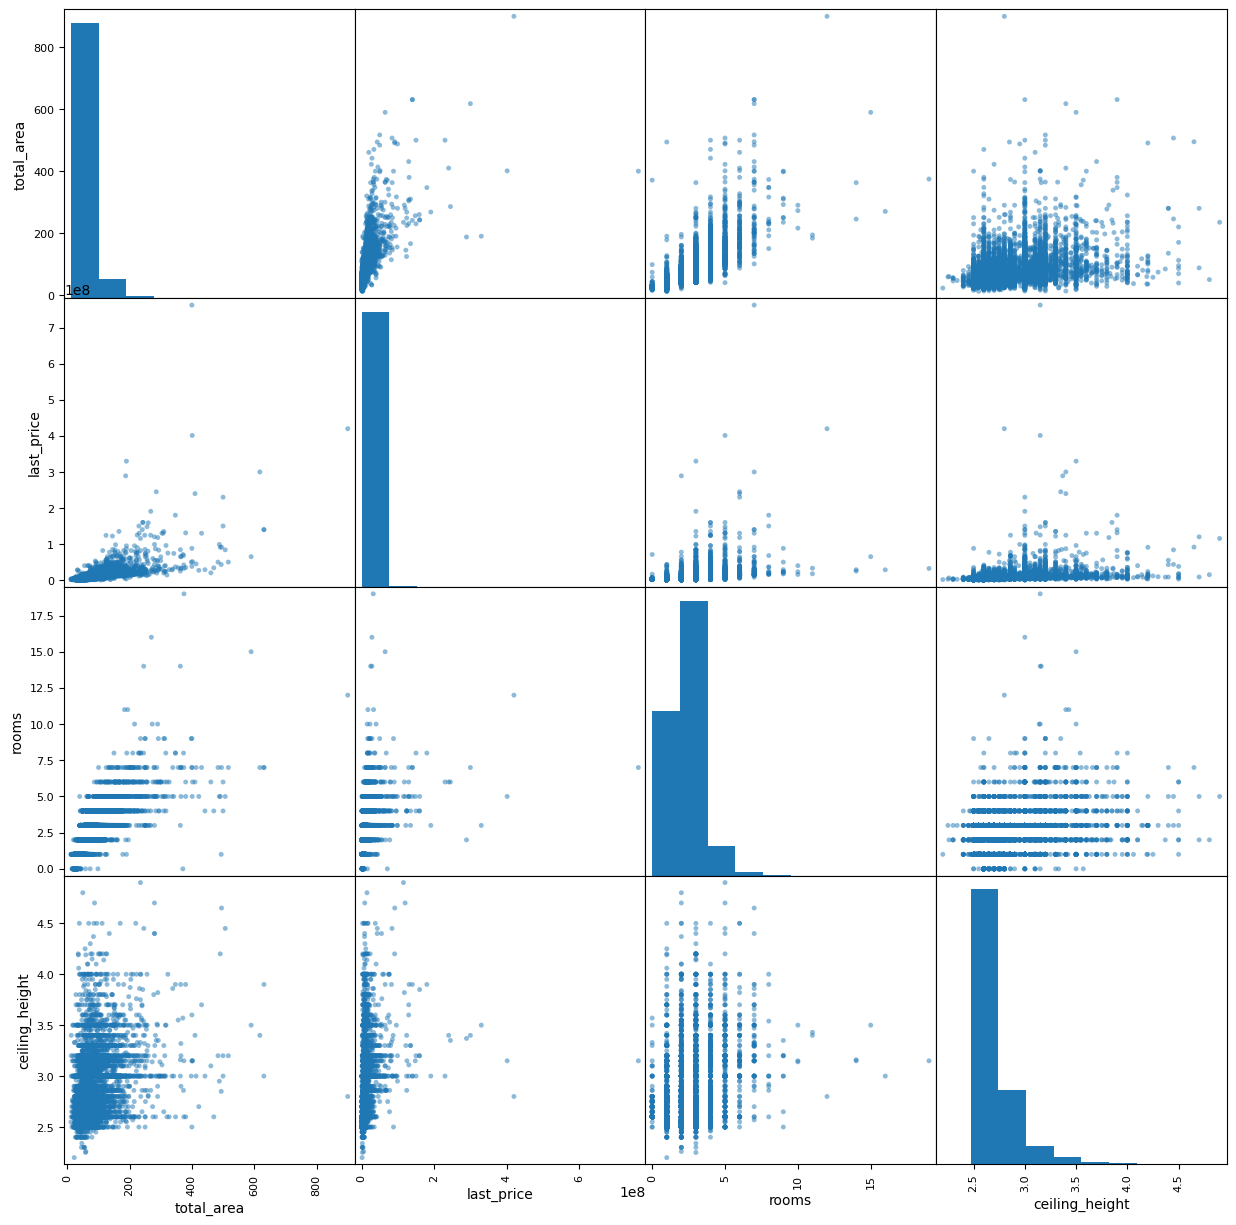

In [64]:
def scatter_matrix(data, columns, marker_size=50, alpha_value=0.5):
    pd.plotting.scatter_matrix(data[columns], figsize=(15, 15), alpha=alpha_value, diagonal='hist', s=marker_size)
    plt.show()
scatter_matrix(data, ['total_area', 'last_price', 'rooms', 'ceiling_height'])

Можно сразу заметить что во многих гистограммах есть выбросы, избавимся от некоторых из них:

In [65]:
data = data.query("group_total_area != 'Исключение min' and group_total_area != 'Исключение max'")
data[data['group_total_area']== 'Исключение max']

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, parks_nearest_category, ponds_nearest_category, distance_group_city, group_total_area, group_days_exposition, first_exposition_day_of_week, first_exposition_month, first_exposition_year, type_floor, km_cityCenters_nearest, price_per_area]
Index: []

In [66]:
data['total_area'].describe()

count    23444.000000
mean        59.002883
std         28.763840
min         20.000000
25%         40.000000
50%         52.000000
75%         69.100000
max        249.900000
Name: total_area, dtype: float64

In [67]:
data['living_area'].describe()

count    21605.000000
mean        33.767239
std         18.862770
min          2.000000
25%         18.600000
50%         30.000000
75%         42.100000
max        220.000000
Name: living_area, dtype: float64

Большие выбросы в last_price мешают анализу и смещают медиану, скорее всего виноваты не реалистичные цены. Расмотрим описание этого столбца подробнее

In [68]:
data['last_price'].describe()

count    2.344400e+04
mean     6.188606e+06
std      7.016440e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

In [69]:
data['price_per_area'].describe()

count    2.344400e+04
mean     9.874411e+04
std      4.674145e+04
min      1.118300e+02
25%      7.652321e+04
50%      9.489715e+04
75%      1.139601e+05
max      1.736842e+06
Name: price_per_area, dtype: float64

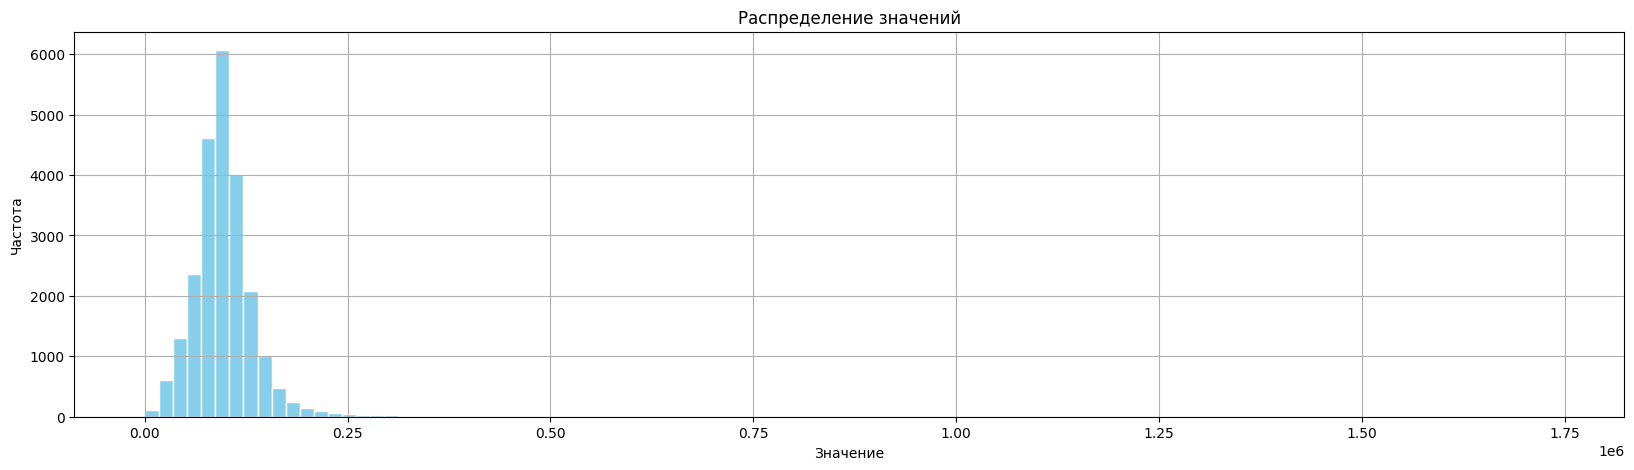

In [70]:
data.price_per_area.hist(figsize=(20,5), bins=100, color='skyblue', edgecolor='black', ec="white")
plt.title('Распределение значений')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

В данных обнаружены нереалистично низкие и высокие значения стоимости квадратного метра жилья. Было решено исключить из анализа квартиры, стоимость которых ниже 25 тысяч и выше 250 тыс за квадратный метр.

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23444 entries, 0 to 23698
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_images                  23444 non-null  int64         
 1   last_price                    23444 non-null  float64       
 2   total_area                    23444 non-null  float64       
 3   first_day_exposition          23444 non-null  datetime64[ns]
 4   rooms                         23444 non-null  int64         
 5   ceiling_height                23444 non-null  float64       
 6   floors_total                  23444 non-null  int64         
 7   living_area                   21605 non-null  float64       
 8   floor                         23444 non-null  int64         
 9   is_apartment                  23444 non-null  bool          
 10  studio                        23444 non-null  bool          
 11  open_plan                     234

In [72]:
data['price_per_area'].quantile(0.99)

253093.79919999995

In [73]:
data['price_per_area'].quantile(0.01)

23120.619

In [74]:
data = data.query('25000 <= price_per_area <= 250000')

In [75]:
data.describe()

total_images    last_price    total_area  \
count  22921.000000  2.292100e+04  22921.000000   
mean       9.853322  5.820284e+06     58.416087   
min        0.000000  7.500000e+05     20.000000   
25%        6.000000  3.450000e+06     40.000000   
50%        9.000000  4.625000e+06     51.700000   
75%       14.000000  6.690000e+06     68.700000   
max       50.000000  5.600000e+07    249.900000   
std        5.659179  4.231467e+06     27.747018   

                first_day_exposition         rooms  ceiling_height  \
count                          22921  22921.000000    22921.000000   
mean   2017-11-09 19:20:29.632215040      2.043148        2.696640   
min              2014-11-27 00:00:00      0.000000        2.200000   
25%              2017-05-15 00:00:00      1.000000        2.600000   
50%              2017-12-12 00:00:00      2.000000        2.600000   
75%              2018-08-25 00:00:00      3.000000        2.750000   
max              2019-05-03 00:00:00     14.000000        4.700000   
std                              NaN      1.023552        0.224243   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  22921.000000  21157.000000  22921.000000  20949.000000  22921.000000   
mean      10.804502     33.438763      5.932856     10.281569      0.598839   
min        1.000000      2.000000      1.000000      0.000000      0.000000   
25%        5.000000     18.500000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.000000      0.000000   
75%       16.000000     42.000000      8.000000     11.900000      1.000000   
max       60.000000    184.000000     33.000000     70.000000      5.000000   
std        6.617105     18.367536      4.904844      5.192524      0.962978   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
count      17695.000000         17716.000000      22921.000000    7766.000000   
mean       28832.478384         14355.168492          0.460364     493.391321   
min            0.000000           181.000000          0.000000       1.000000   
25%        18487.500000          9563.250000          0.000000     290.000000   
50%        26791.000000         13212.500000          0.000000     456.000000   
75%        37407.000000         16381.500000          1.000000     613.000000   
max        84869.000000         65968.000000          3.000000    3190.000000   
std        12719.370985          8592.274994          0.736313     341.790923   

       ponds_around3000  ponds_nearest  days_exposition  \
count      22921.000000    8764.000000     19897.000000   
mean           0.580647     522.624715       179.696085   
min            0.000000      13.000000         1.000000   
25%            0.000000     302.000000        45.000000   
50%            0.000000     507.000000        95.000000   
75%            1.000000     733.000000       230.000000   
max            3.000000    1344.000000      1580.000000   
std            0.871228     278.021747       218.400534   

       first_exposition_day_of_week  first_exposition_month  \
count                  22921.000000            22921.000000   
mean                       2.562323                6.400593   
min                        0.000000                1.000000   
25%                        1.000000                3.000000   
50%                        3.000000                6.000000   
75%                        4.000000               10.000000   
max                        6.000000               12.000000   
std                        1.787967                3.492936   

       first_exposition_year  km_cityCenters_nearest  price_per_area  
count           22921.000000            17716.000000    22921.000000  
mean             2017.369530               14.349232    96866.772566  
min              2014.000000                0.000000    25000.000000  
25%              2017.000000               10.000000    77132.490000  
50%              20

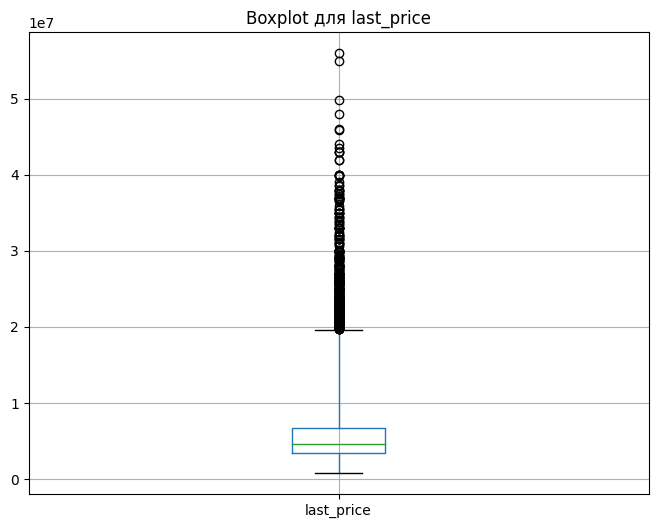

In [76]:
plot_boxplots(data, ['last_price'], whis=4)

Посмотрим как изменились данные после отчистки от аномальных значений

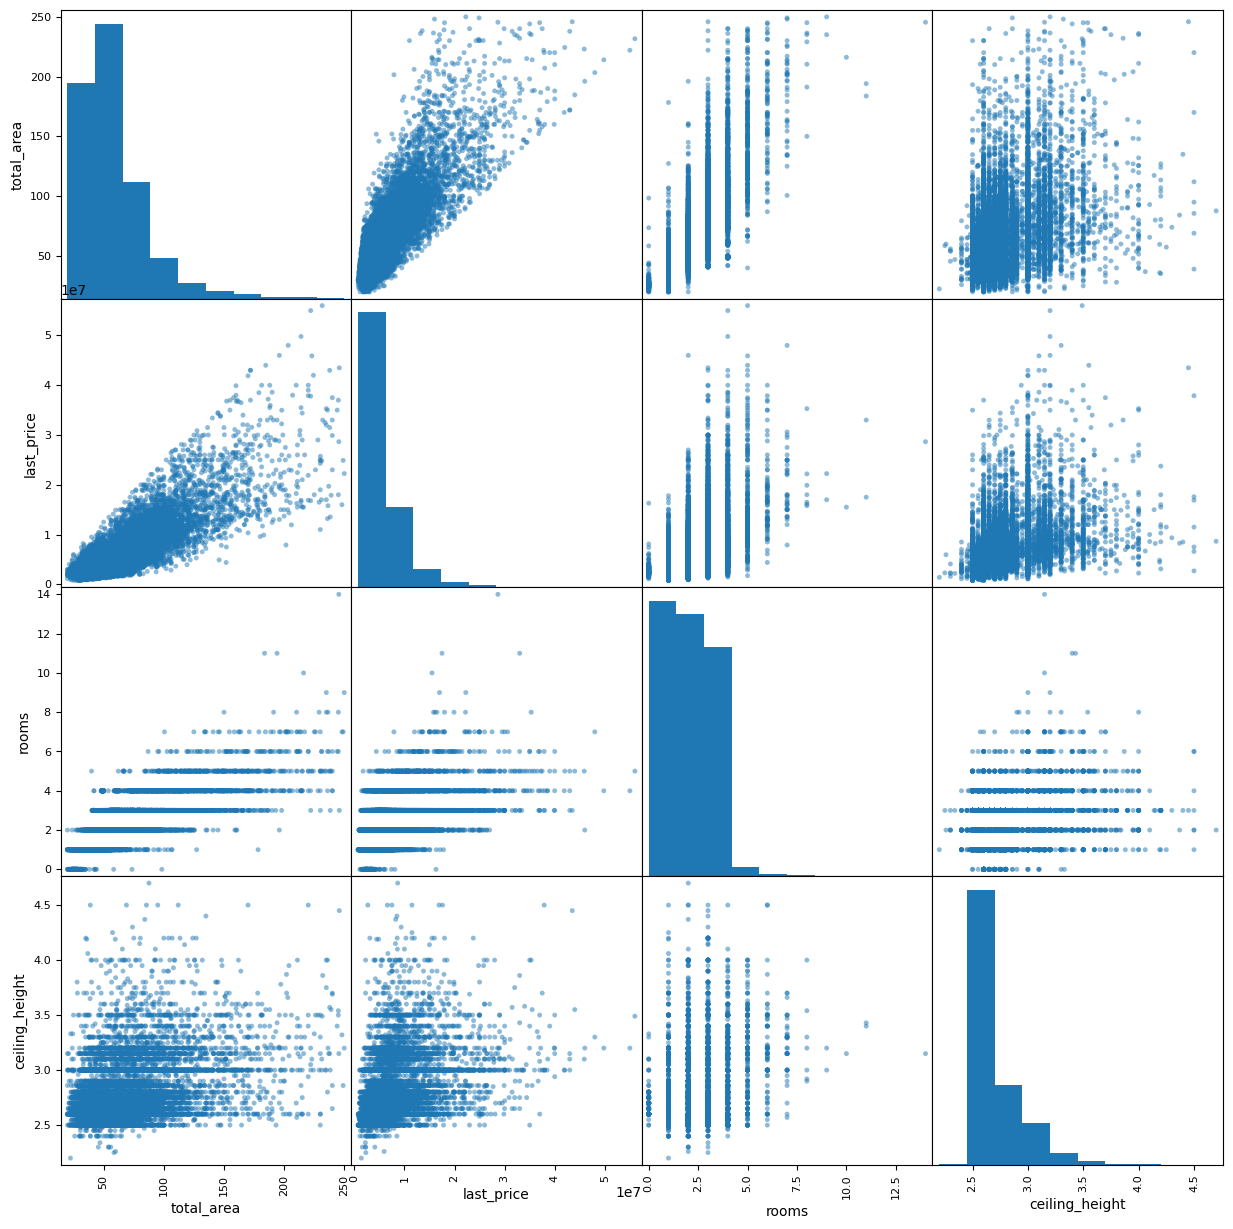

In [77]:
scatter_matrix(data, ['total_area', 'last_price', 'rooms', 'ceiling_height'])

In [78]:
data['total_area'].describe()

count    22921.000000
mean        58.416087
std         27.747018
min         20.000000
25%         40.000000
50%         51.700000
75%         68.700000
max        249.900000
Name: total_area, dtype: float64

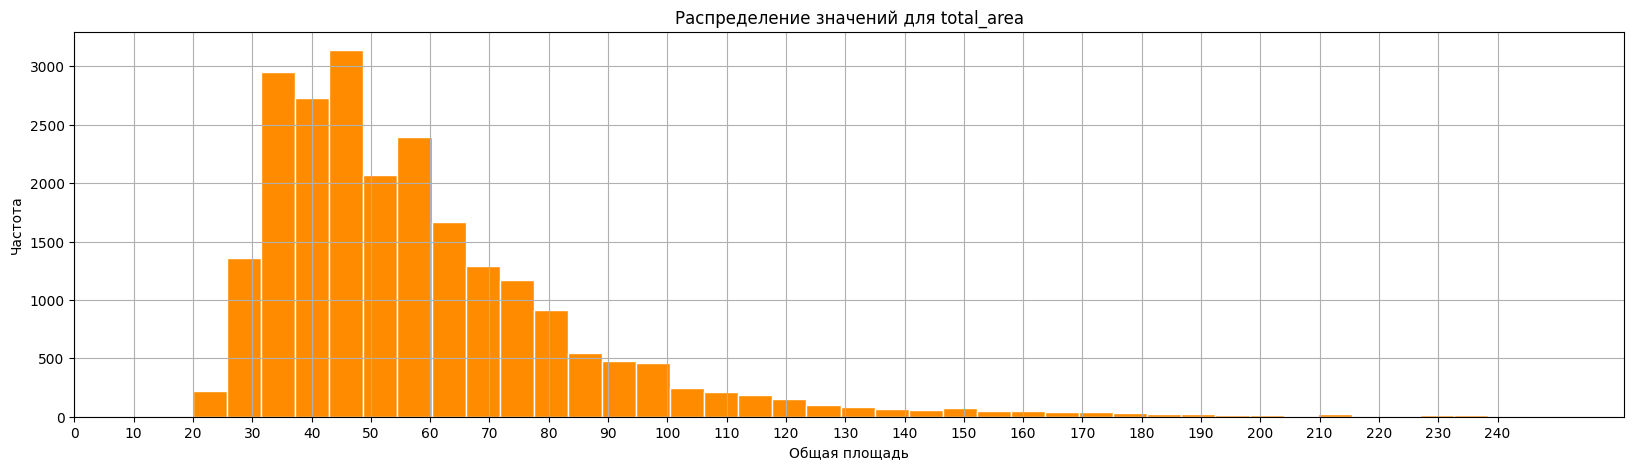

In [79]:
data.total_area.hist(figsize=(20,5), bins=40, color='#FF8C00', ec="white")
plt.xticks(range(0, 250, 10))
plt.title('Распределение значений для total_area')
plt.xlabel('Общая площадь')
plt.ylabel('Частота')
plt.show()

In [80]:
data['total_area'].quantile(0.99)

168.15999999999985

Наиболее типичное значение для данного графика это ~45.
На данном графике много аномальных данных, которые достаточно редкие для этого df, удалим те которые привышают 160 квадратных метров.

In [81]:
data = data.query('total_area <= 160')

In [82]:
data['rooms'].describe()

count    22641.000000
mean         2.006978
std          0.961330
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

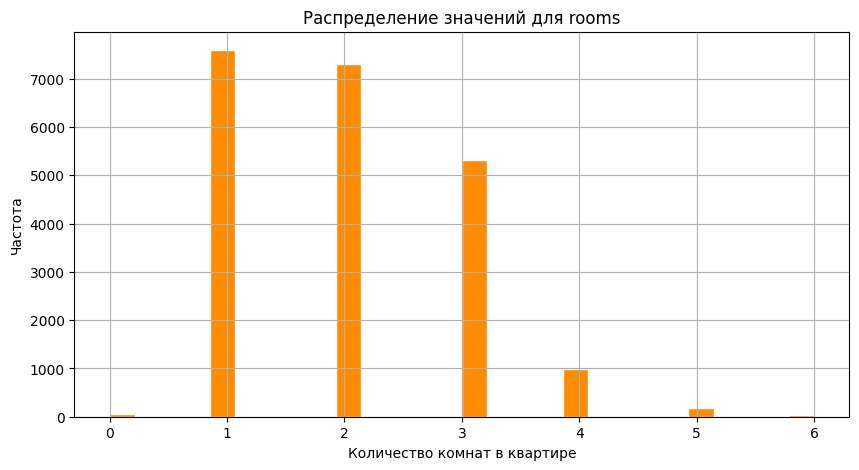

In [164]:
data.rooms.hist(figsize=(10,5), bins=28, color='#FF8C00', ec="white")
plt.title('Распределение значений для rooms')
plt.xlabel('Количество комнат в квартире')
plt.ylabel('Частота')
plt.show()

Анализируя этот график видно что типичное значение равно одной комнате в квартире.
Уберем аномалии в столбце rooms, поскольку 7 комнат и более, редкие для этих данных значение


In [165]:
data = data.query('rooms < 7')
data['rooms'].describe()

count    21459.000000
mean         2.011976
std          0.946808
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

In [166]:
data['ceiling_height'].describe()

count    21459.000000
mean         2.689098
std          0.204800
min          2.500000
25%          2.600000
50%          2.600000
75%          2.750000
max          3.980000
Name: ceiling_height, dtype: float64

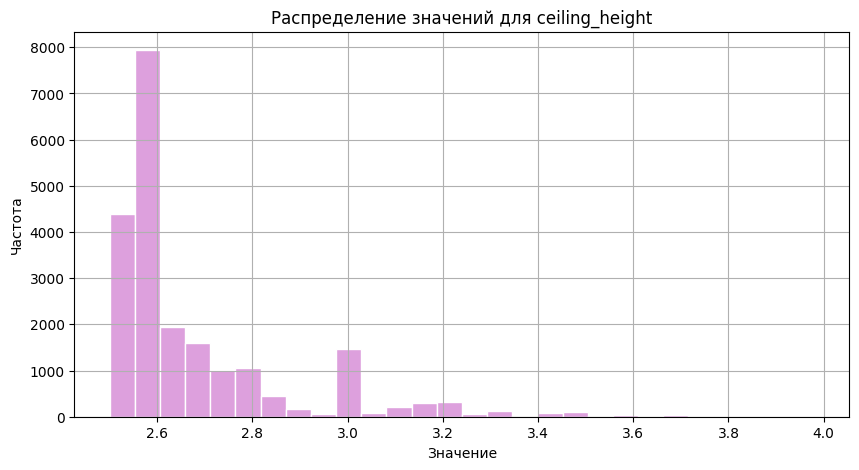

In [167]:
data.ceiling_height.hist(figsize=(10,5), bins=28, color='#DDA0DD', ec="white")
plt.title('Распределение значений для ceiling_height')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

Типичное значение для этого графика 2.6-2.7
Значения меньше 2.5 и больше 4 совсем мало, удалим их

In [168]:
data = data.query('2.5 <= ceiling_height < 4')
data['ceiling_height'].describe()

count    21459.000000
mean         2.689098
std          0.204800
min          2.500000
25%          2.600000
50%          2.600000
75%          2.750000
max          3.980000
Name: ceiling_height, dtype: float64

;

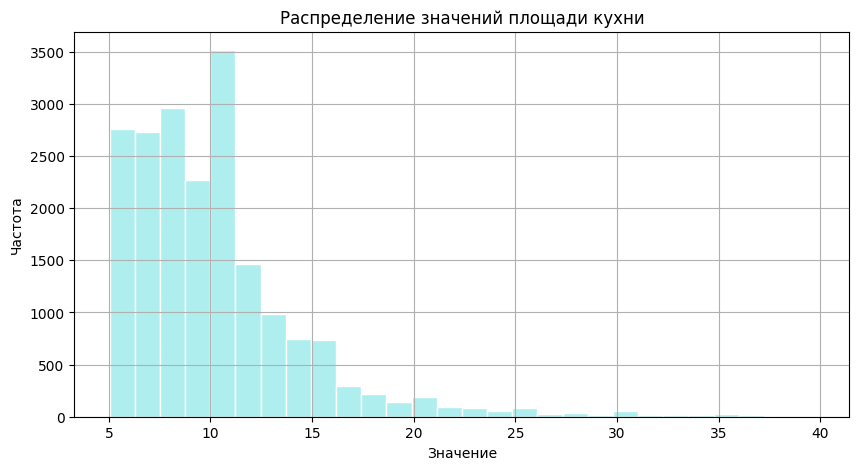

In [169]:
data.kitchen_area.hist(figsize=(10,5), bins=28, color='#AFEEEE', ec="white")
plt.title('Распределение значений площади кухни')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()



In [170]:
data['kitchen_area'].describe()

count    19549.000000
mean        10.173812
std          4.308669
min          5.040000
25%          7.100000
50%          9.100000
75%         11.700000
max         39.700000
Name: kitchen_area, dtype: float64

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21459 entries, 0 to 23698
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_images                  21459 non-null  int64         
 1   last_price                    21459 non-null  float64       
 2   total_area                    21459 non-null  float64       
 3   first_day_exposition          21459 non-null  datetime64[ns]
 4   rooms                         21459 non-null  int64         
 5   ceiling_height                21459 non-null  float64       
 6   floors_total                  21459 non-null  int64         
 7   living_area                   19773 non-null  float64       
 8   floor                         21459 non-null  int64         
 9   is_apartment                  21459 non-null  bool          
 10  studio                        21459 non-null  bool          
 11  open_plan                     214

Типичное значение для этого графика 7-8 квадратных метров, значений больше 30 совсем мало, удалим их

#### check nan

In [91]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22515 entries, 0 to 23698
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_images                  22515 non-null  int64         
 1   last_price                    22515 non-null  float64       
 2   total_area                    22515 non-null  float64       
 3   first_day_exposition          22515 non-null  datetime64[ns]
 4   rooms                         22515 non-null  int64         
 5   ceiling_height                22515 non-null  float64       
 6   floors_total                  22515 non-null  int64         
 7   living_area                   20786 non-null  float64       
 8   floor                         22515 non-null  int64         
 9   is_apartment                  22515 non-null  bool          
 10  studio                        22515 non-null  bool          
 11  open_plan                     225

In [92]:
data = data[(data['kitchen_area'].isnull()) | ((data['kitchen_area'] > 5) & (data['kitchen_area'] < 40))]
data['kitchen_area'].describe()

count    19926.000000
mean        10.186105
std          4.336755
min          5.040000
25%          7.100000
50%          9.100000
75%         11.700000
max         39.700000
Name: kitchen_area, dtype: float64

In [93]:
data['kitchen_area']

0        25.00
1        11.00
2         8.30
5         9.10
6        14.40
         ...  
23694    13.83
23695     8.50
23696      NaN
23697    23.30
23698     9.00
Name: kitchen_area, Length: 21861, dtype: float64

In [94]:
data.shape[0]

21861

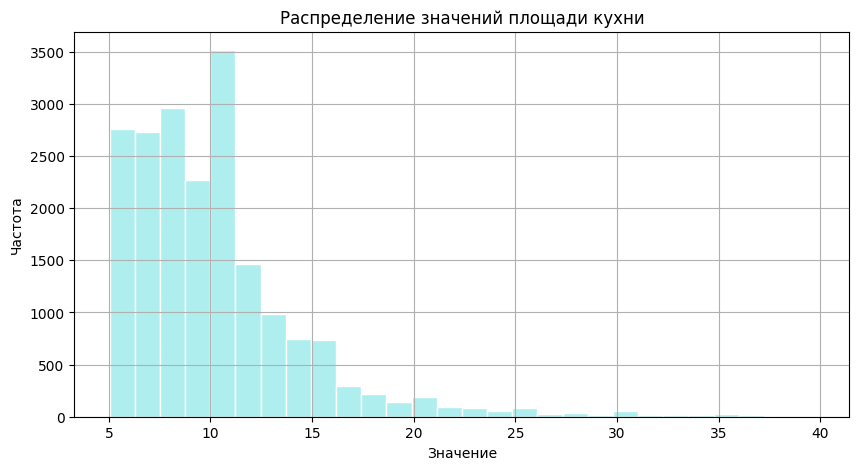

In [172]:
data.kitchen_area.hist(figsize=(10,5), bins=28, color='#AFEEEE', ec="white")
plt.title('Распределение значений площади кухни')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

Мода расположена в диапазоне 8-9 кв метров. Аномальные значения были убраны.

##### Вывод для *'total_area', 'last_price', 'rooms' и 'ceiling_height'*


Теперь ясно видно положительную корреляцию между last_price и total_area, чем больше площадь квартиры тем выше цена. Проверим это утверждение таблицей корреляционной матрицы.

Конечно слабая положительная зависимость есть между 'rooms' и 'last_price', но в данном случае диаграмма рассеивания не очень показательная из-за ограниченного количества вариантов в столбце 'rooms', она выстраивается колонками.

#### Продолжение анализа гистограмм

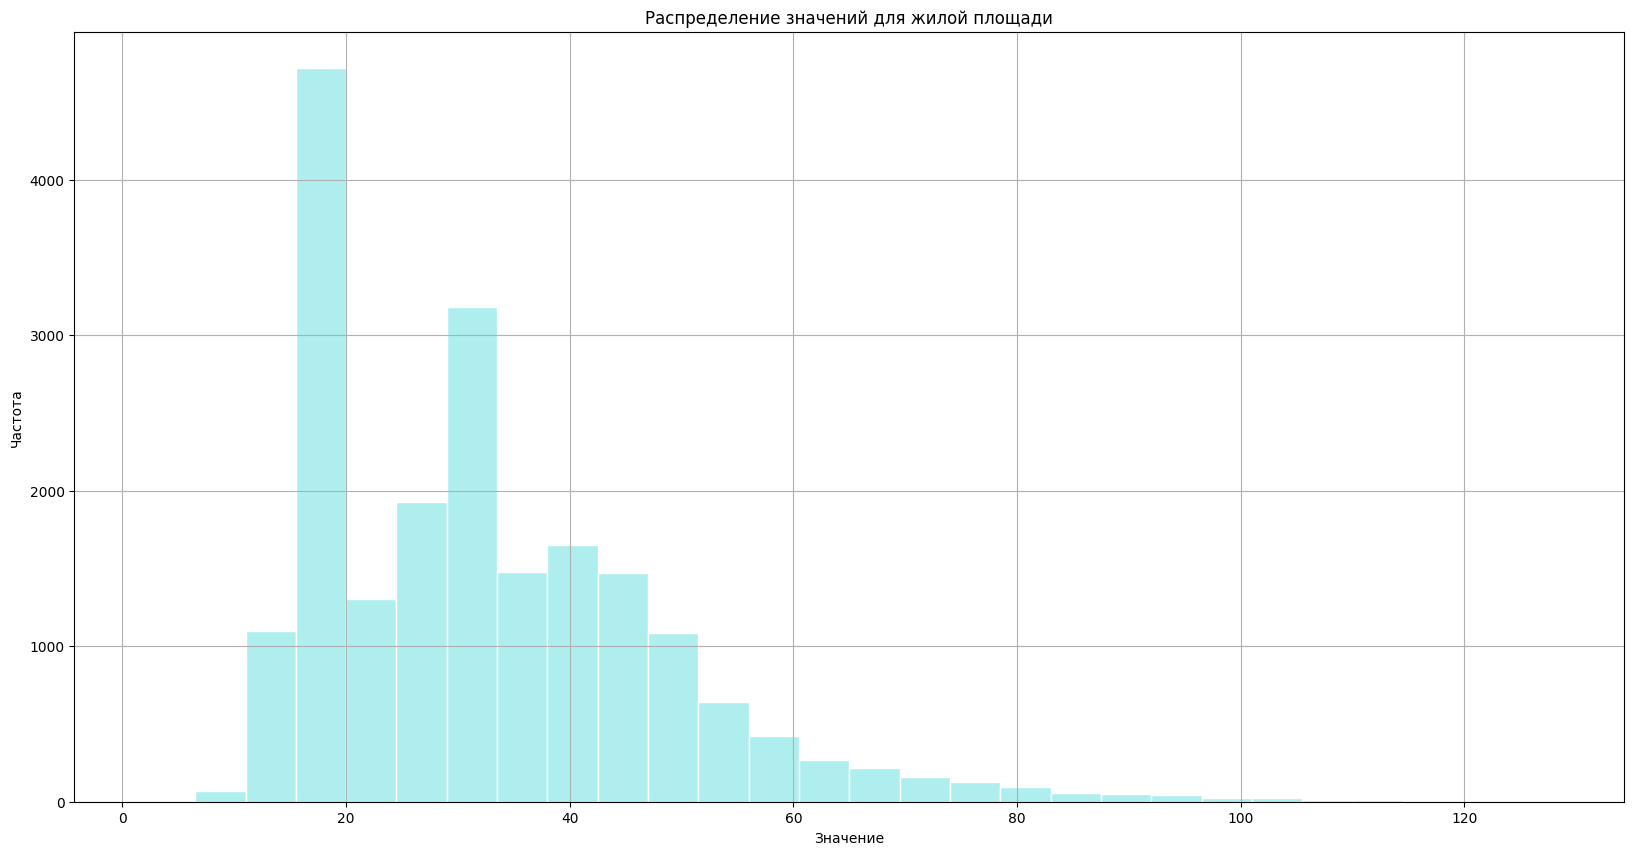

In [96]:
data.living_area.hist(figsize=(10,5), bins=28, color='#AFEEEE', ec="white")
plt.title('Распределение значений для жилой площади')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()


In [97]:
data['living_area'].describe()

count    20151.000000
mean        32.518416
std         15.746425
min          2.000000
25%         18.500000
50%         30.000000
75%         41.900000
max        128.000000
Name: living_area, dtype: float64

In [98]:
data = data[(data['living_area'].isnull()) | ((data['living_area'] > 8) & (data['living_area'] < 120))]
data['living_area'].describe()

count    20141.000000
mean        32.514006
std         15.701687
min          8.300000
25%         18.500000
50%         30.000000
75%         41.900000
max        118.500000
Name: living_area, dtype: float64

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21851 entries, 0 to 23698
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_images                  21851 non-null  int64         
 1   last_price                    21851 non-null  float64       
 2   total_area                    21851 non-null  float64       
 3   first_day_exposition          21851 non-null  datetime64[ns]
 4   rooms                         21851 non-null  int64         
 5   ceiling_height                21851 non-null  float64       
 6   floors_total                  21851 non-null  int64         
 7   living_area                   20141 non-null  float64       
 8   floor                         21851 non-null  int64         
 9   is_apartment                  21851 non-null  bool          
 10  studio                        21851 non-null  bool          
 11  open_plan                     218

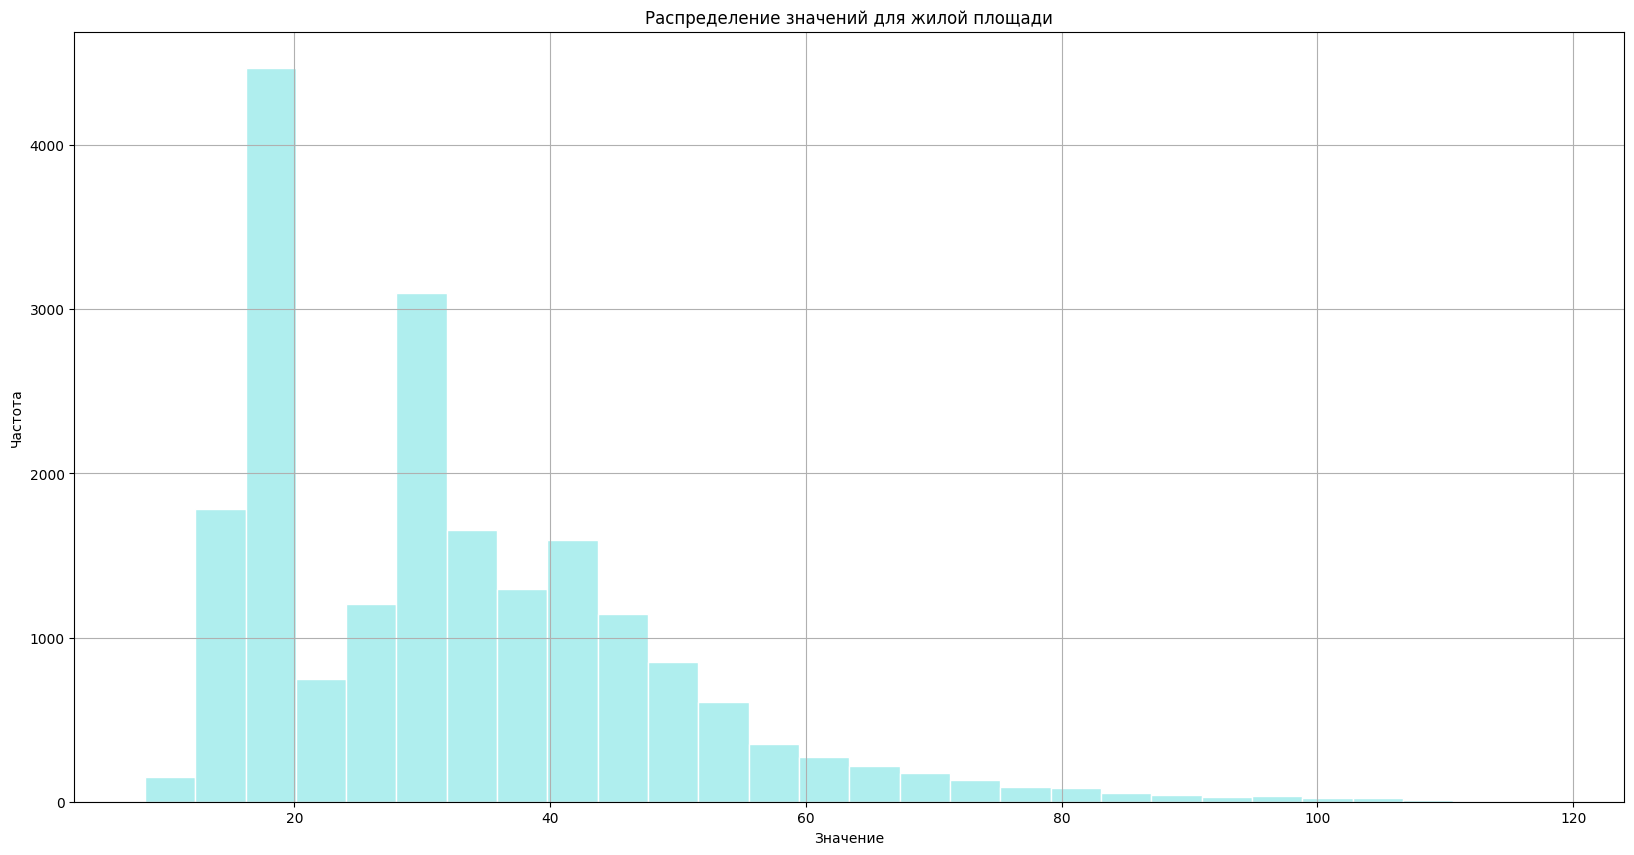

In [100]:
data.living_area.hist(figsize=(10,5), bins=28, color='#AFEEEE', ec="white")
plt.title('Распределение значений для жилой площади')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

Больше всего значений для жилой площади размером от 15 до 20 кв метров.

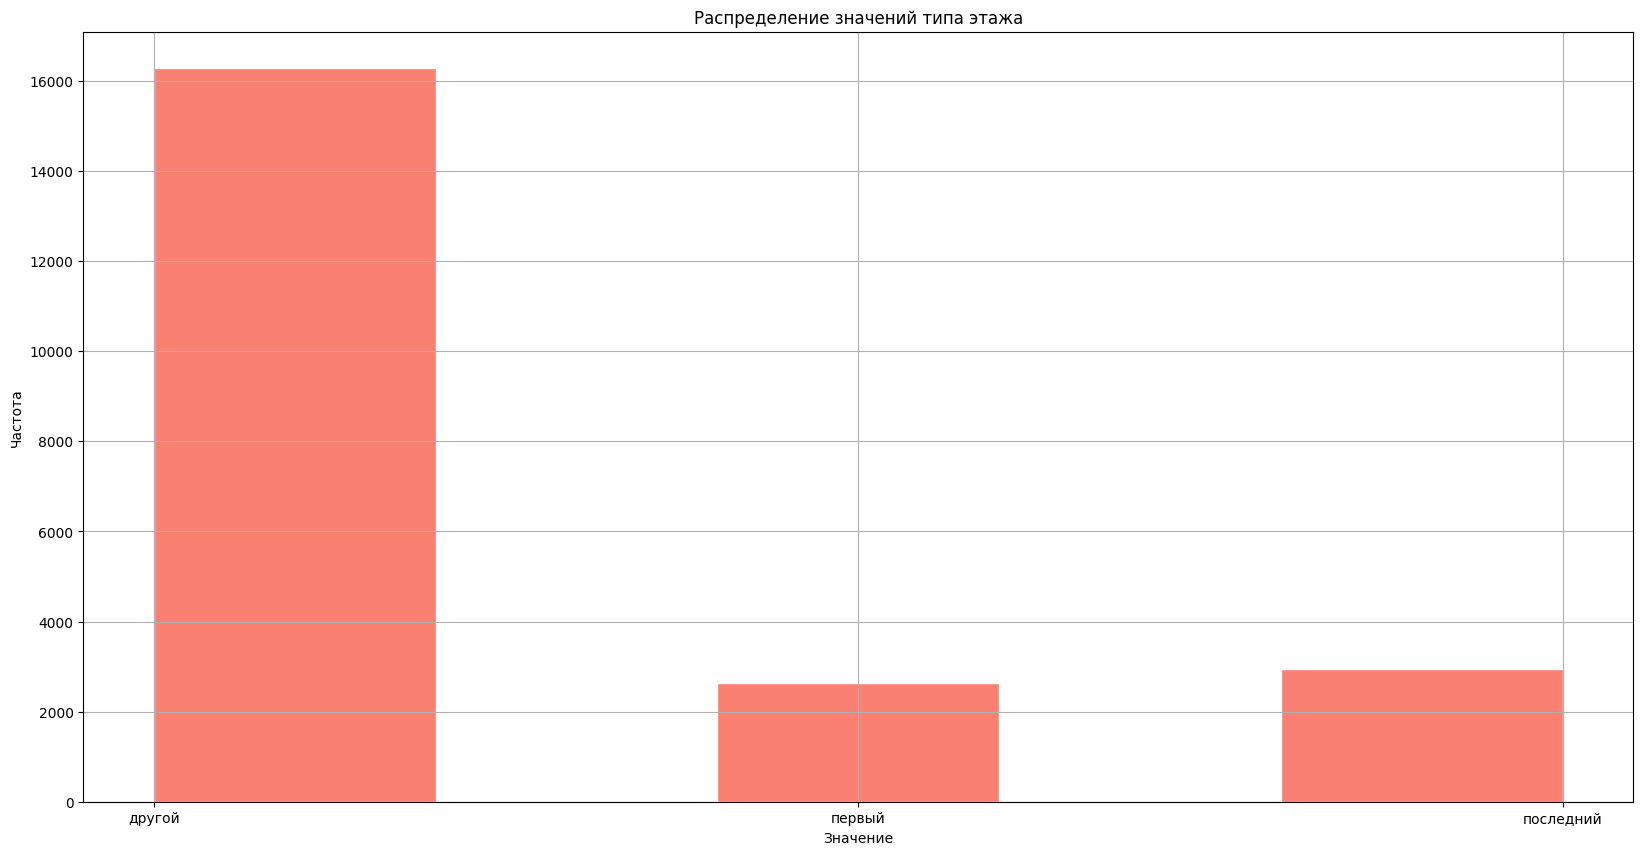

In [101]:
data.type_floor.hist(figsize=(10,5), bins=5, color='#FA8072', ec="white")
plt.title('Распределение значений типа этажа')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

Типичное значение для этого графика 'другое', и это логично, больше всего квартир с этажами выше первого и ниже последнего

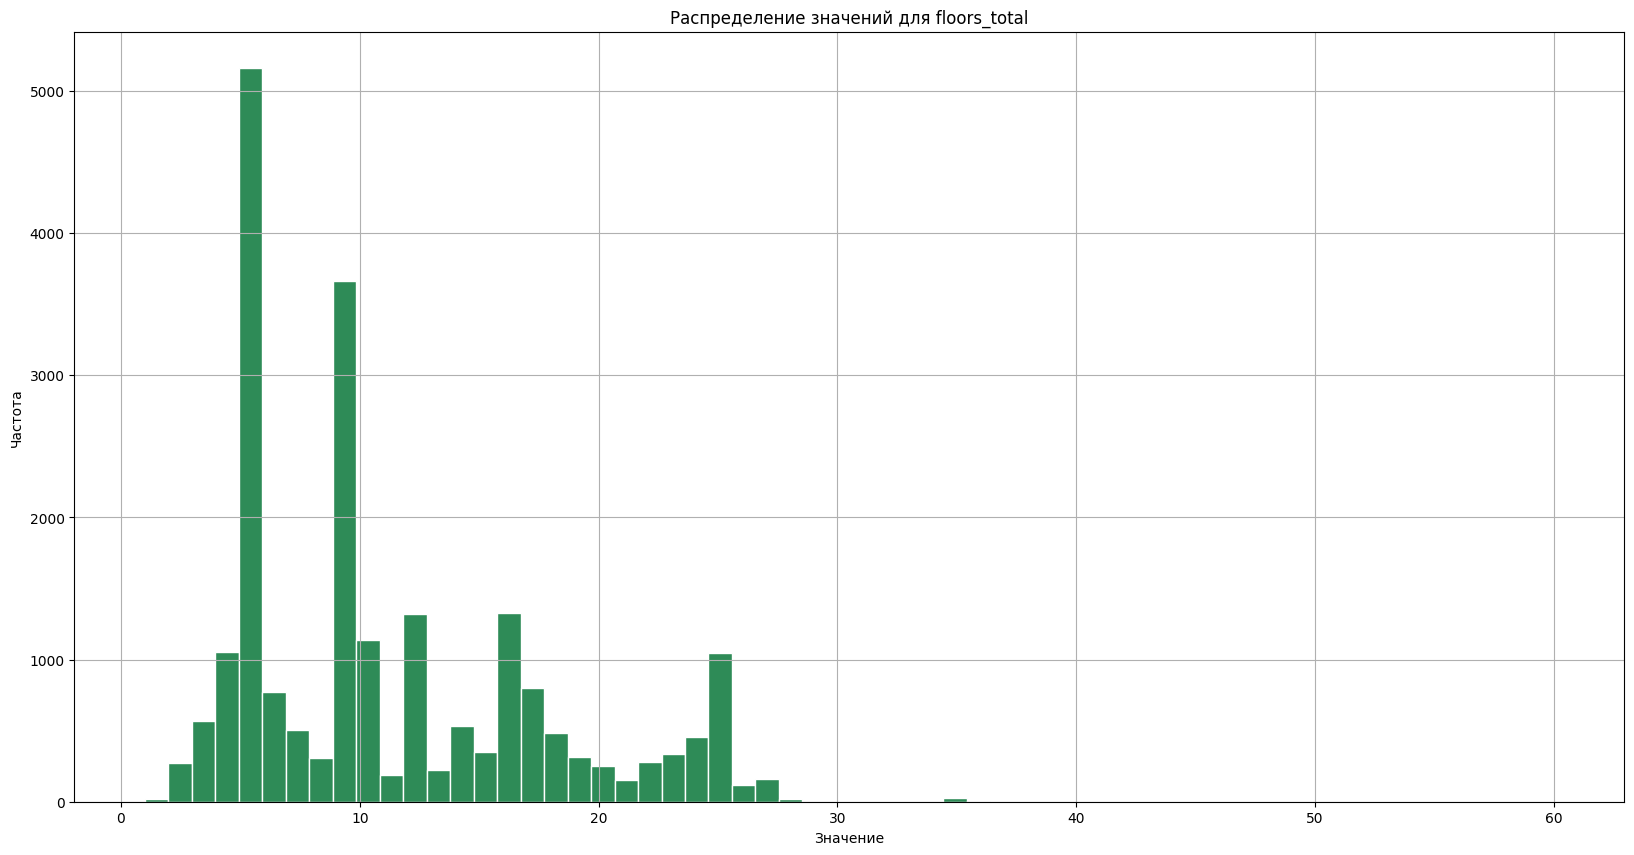

In [102]:
data.floors_total.hist(figsize=(10,5), bins=60, color='#2E8B57', ec="white")
plt.title('Распределение значений для floors_total')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

Типичное значение для этого графика это примерно 5 этажей, что нормально для низкой застройки Санкт-Петербурга.
На данном графике в основном представлены от 1 до 30 этажные дома, для этой выборки этажи выше 30 аномалия

In [103]:
data['floors_total'].describe()

count    21851.000000
mean        10.926685
std          6.614832
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21851 entries, 0 to 23698
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_images                  21851 non-null  int64         
 1   last_price                    21851 non-null  float64       
 2   total_area                    21851 non-null  float64       
 3   first_day_exposition          21851 non-null  datetime64[ns]
 4   rooms                         21851 non-null  int64         
 5   ceiling_height                21851 non-null  float64       
 6   floors_total                  21851 non-null  int64         
 7   living_area                   20141 non-null  float64       
 8   floor                         21851 non-null  int64         
 9   is_apartment                  21851 non-null  bool          
 10  studio                        21851 non-null  bool          
 11  open_plan                     218

In [105]:
data = data.query('0 < floors_total <= 30')
data['floors_total'].describe()

count    21821.000000
mean        10.891664
std          6.548528
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

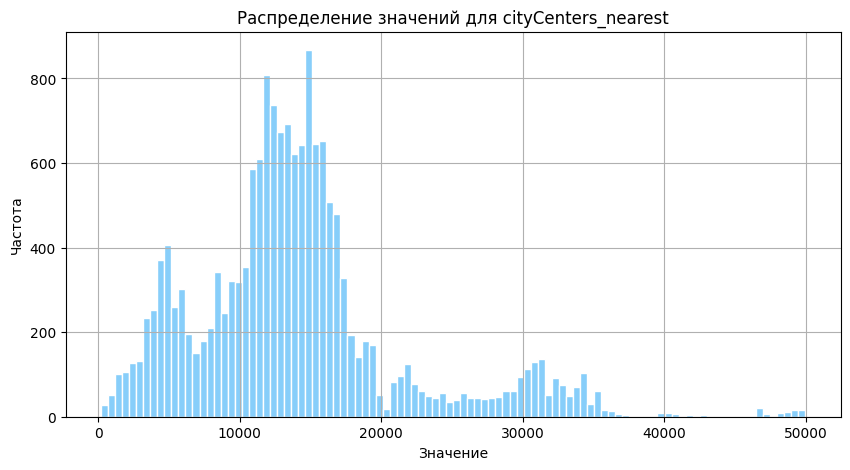

In [173]:
data.cityCenters_nearest.hist(figsize=(10,5), bins=100, color='#87CEFA', ec="white")
plt.title('Распределение значений для cityCenters_nearest')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()


Типичное значение для этого графика это примерно 16 км от центра города.
Значения выше 50 км можно назвать аномалией, удалим их

In [107]:
data['cityCenters_nearest'].quantile(0.99)

49703.29999999989

In [108]:
data['cityCenters_nearest'].describe()

count    16866.000000
mean     14391.722993
std       8433.070034
min        181.000000
25%       9798.000000
50%      13251.500000
75%      16360.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [109]:
data = data[(data['cityCenters_nearest'].isnull()) | (data['cityCenters_nearest'] < 50000)]

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21663 entries, 0 to 23698
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_images                  21663 non-null  int64         
 1   last_price                    21663 non-null  float64       
 2   total_area                    21663 non-null  float64       
 3   first_day_exposition          21663 non-null  datetime64[ns]
 4   rooms                         21663 non-null  int64         
 5   ceiling_height                21663 non-null  float64       
 6   floors_total                  21663 non-null  int64         
 7   living_area                   19958 non-null  float64       
 8   floor                         21663 non-null  int64         
 9   is_apartment                  21663 non-null  bool          
 10  studio                        21663 non-null  bool          
 11  open_plan                     216

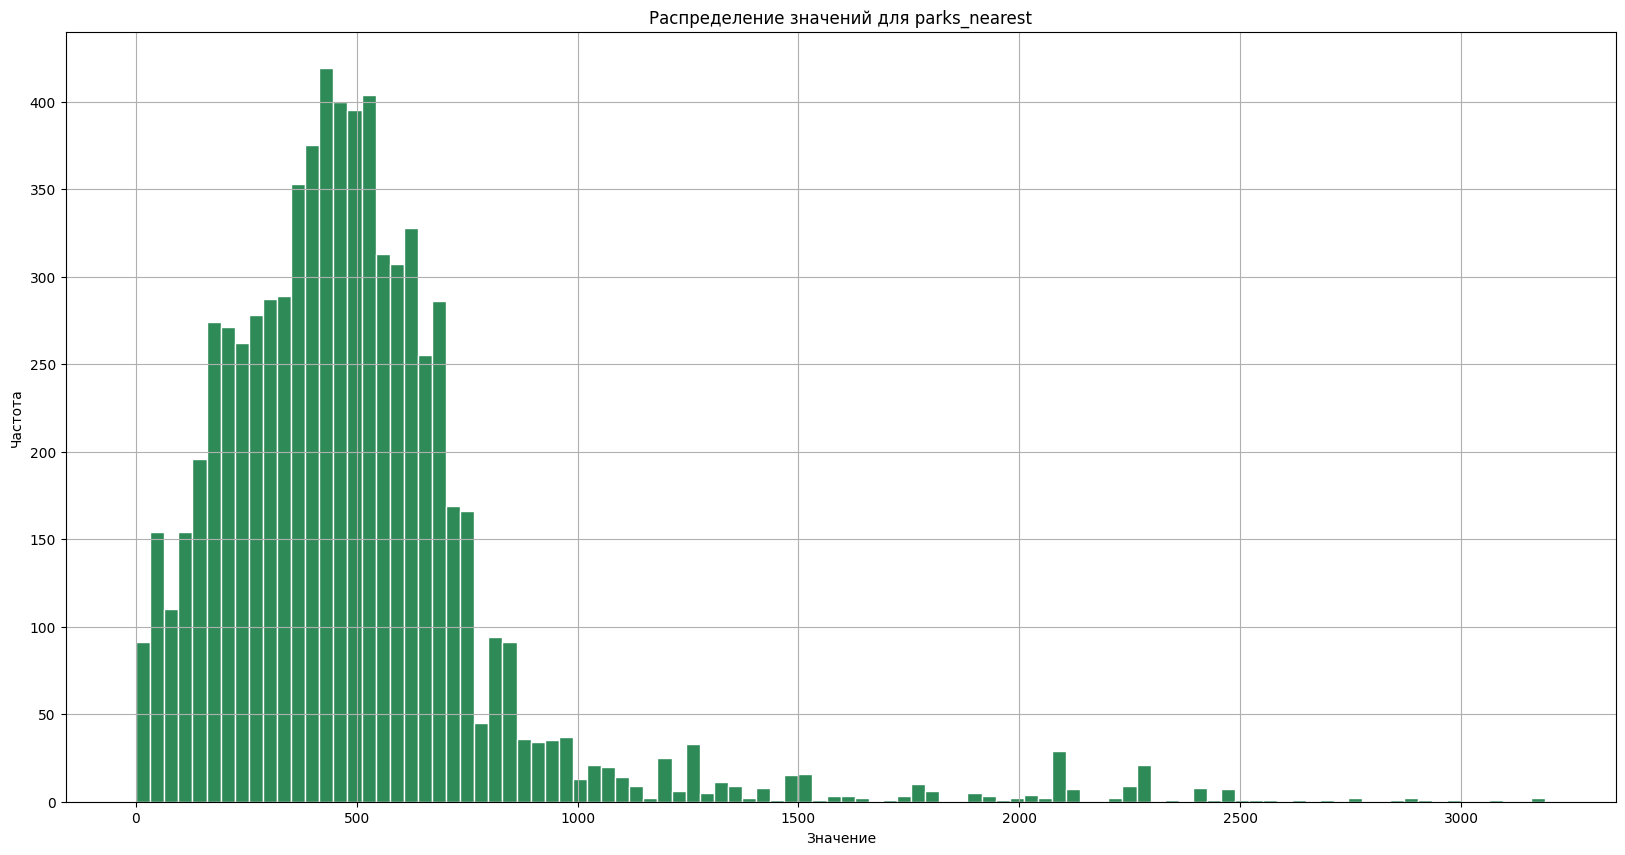

In [111]:
data.parks_nearest.hist(figsize=(10,5), bins=100, color='#2E8B57', ec="white")
plt.title('Распределение значений для parks_nearest')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()


In [112]:
data['parks_nearest'].describe()

count    7264.000000
mean      497.065116
std       344.735455
min         1.000000
25%       292.000000
50%       458.000000
75%       619.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Типичное значение для этого графика немного меньше 500 метров до парка. Но он имеет длинный хвост удалим его используя категории к этому столбцу

In [113]:
data = data.query('parks_nearest_category != "исключение"')
data['parks_nearest'].describe()

count    7200.000000
mean      479.761944
std       292.188430
min         1.000000
25%       289.000000
50%       456.000000
75%       613.000000
max      2137.000000
Name: parks_nearest, dtype: float64

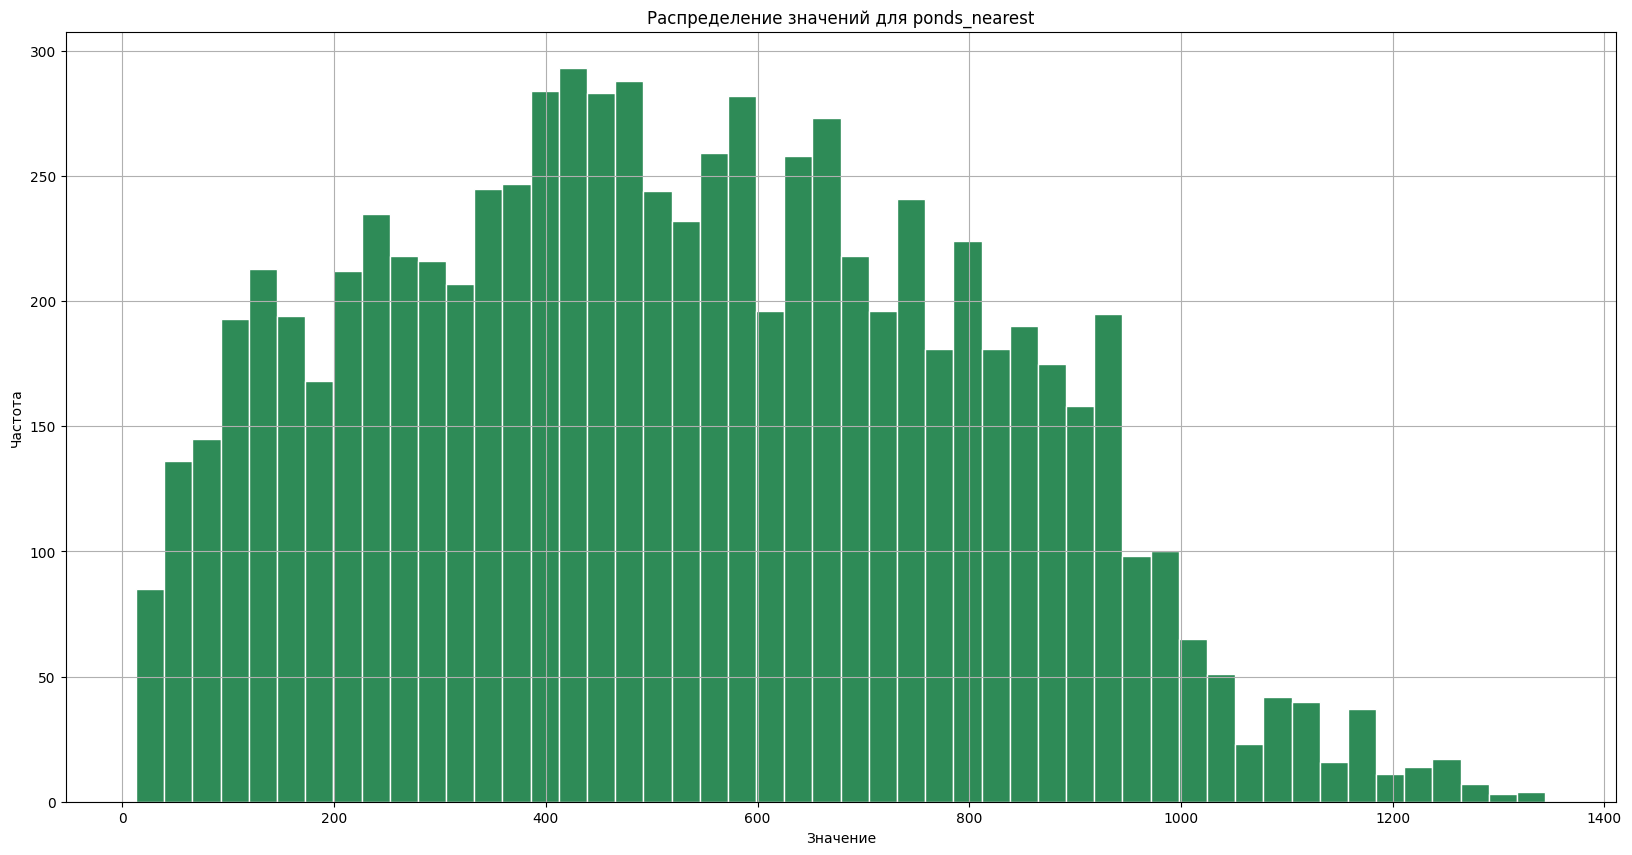

In [115]:
data.ponds_nearest.hist(figsize=(10,5), bins=50, color='#2E8B57', ec="white")
plt.title('Распределение значений для ponds_nearest')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()


Распределение этого столбца выглядит нормально, хотя нет ярко выраженного пика(примерно 420 метров до пруда).


Что бы можно было использовать этот код для создания корреляционных матриц далее, создадим функцию которая принимает DataFrame и нужные колонки, так как весь df слишком большой для использование в матрицы диаграмм рассеяния.

In [116]:
def corr_matrix_data_median(data, columns=None):
    corr_matrix = pd.DataFrame()
    if columns is None:
        columns = []
        for col in data.columns:
            if data[col].dtype in ['int64', 'float64']:
                columns.append(col)
    for col in columns:
        corr_matrix[col] = data[col]
    corr_matrix = corr_matrix.corr()

    return corr_matrix

In [117]:
corr_matrix = corr_matrix_data_median(data, columns=['total_area', 'last_price', 'rooms' ,'ceiling_height'] )

vmin = -1.0
vmax = 0.9

table_corr = (corr_matrix
 .style
 .background_gradient(cmap='coolwarm', vmin=vmin, vmax=vmax)
)
table_corr

Дeйствительно хорошо видно прямую корреляцию(0.921876) last_price от total_area, кроме этого между  last_price и rooms (0.829046) средняя, прямая корреляция , между last_price и ceiling_height есть слабая прямая корреляция (0.377935).

#### check gap

In [118]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21599 entries, 0 to 23698
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_images                  21599 non-null  int64         
 1   last_price                    21599 non-null  float64       
 2   total_area                    21599 non-null  float64       
 3   first_day_exposition          21599 non-null  datetime64[ns]
 4   rooms                         21599 non-null  int64         
 5   ceiling_height                21599 non-null  float64       
 6   floors_total                  21599 non-null  int64         
 7   living_area                   19903 non-null  float64       
 8   floor                         21599 non-null  int64         
 9   is_apartment                  21599 non-null  bool          
 10  studio                        21599 non-null  bool          
 11  open_plan                     215

In [119]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max','median'])
    .style.format("{:,.2f}")
)

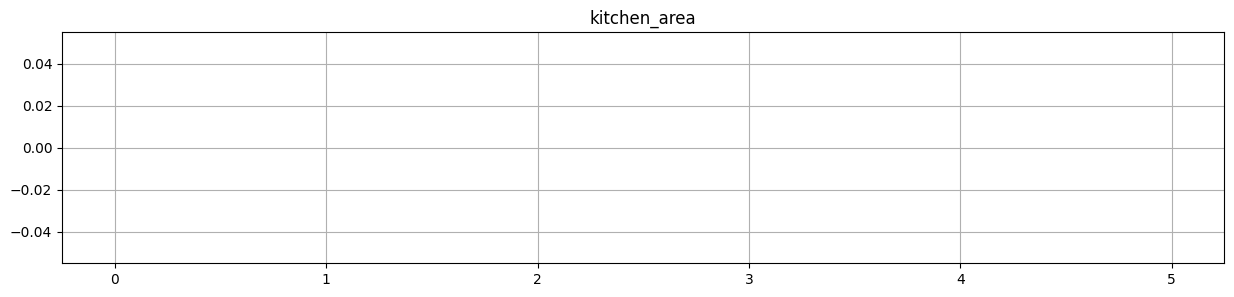

In [120]:
# check
data.hist(column = 'kitchen_area', bins = 50, figsize = (15,3), range = (0,5));

In [121]:
try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [122]:
df_check.rooms.value_counts().to_frame()

count
rooms       
1       8047
2       7940
3       5814
4       1180
5        326
0        197
6        105
7         59
8         12
9          8
10         3
11         2
14         2
15         1
19         1
16         1
12         1

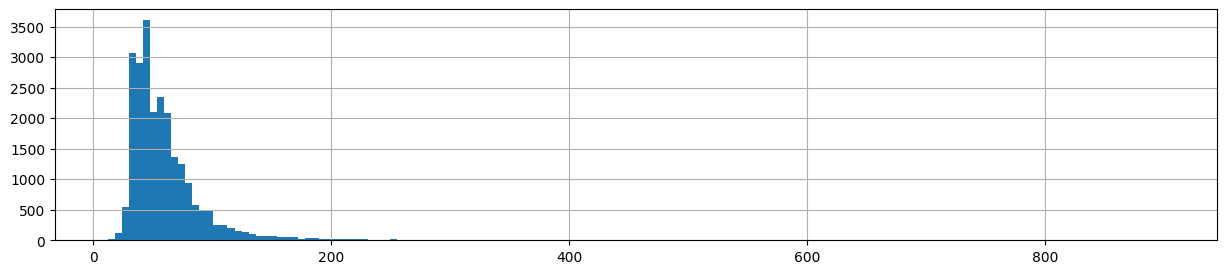

In [123]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3));

Все квартиры менее 20-ти и более 250-ти квадратных метров можно считать редкостями
       

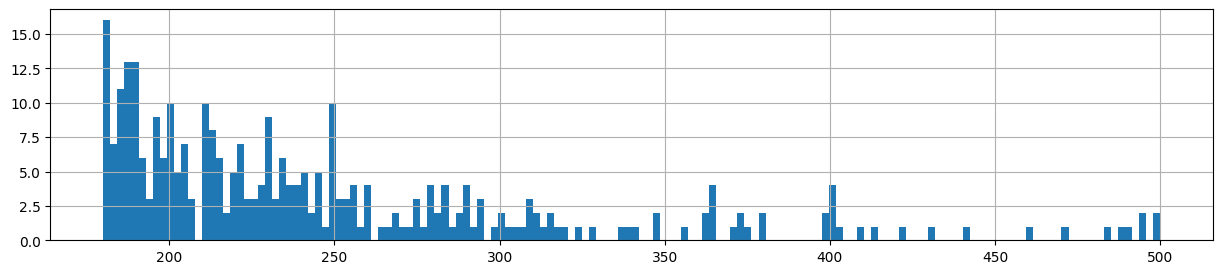

In [124]:
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

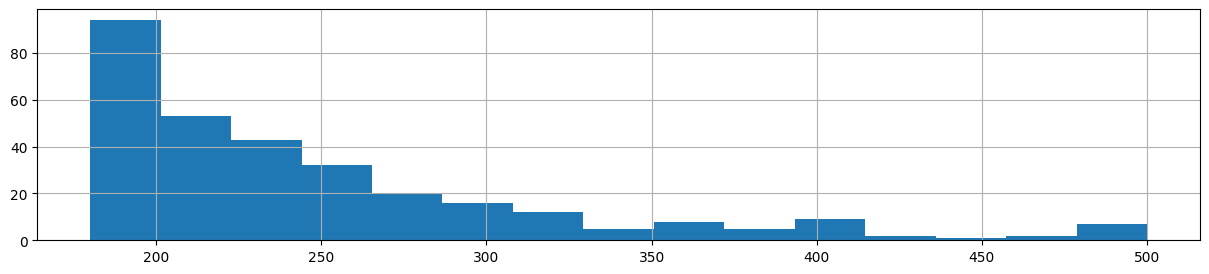

In [125]:
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

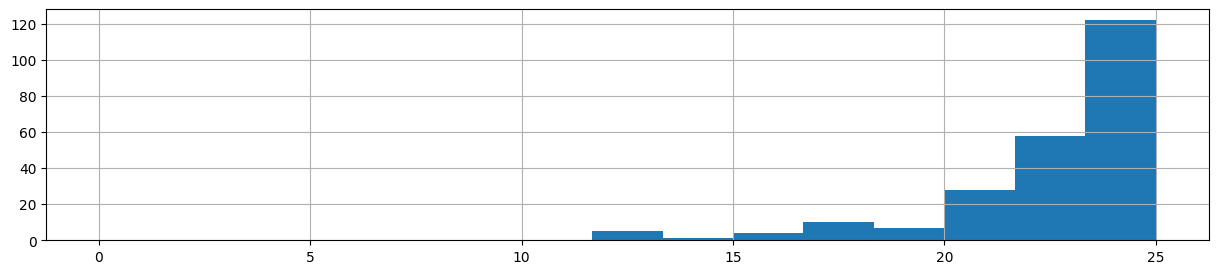

In [126]:
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [127]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей
    .style.format("{:,.2f}")
)

#### Исследование времени размещения объявлений

* Проверим days_exposition и категории group_days_exposition на наличие аномалий и поищим закономерности.
* Для поля days_exposition и категории group_days_exposition построем гистограмму и ящик с усами.


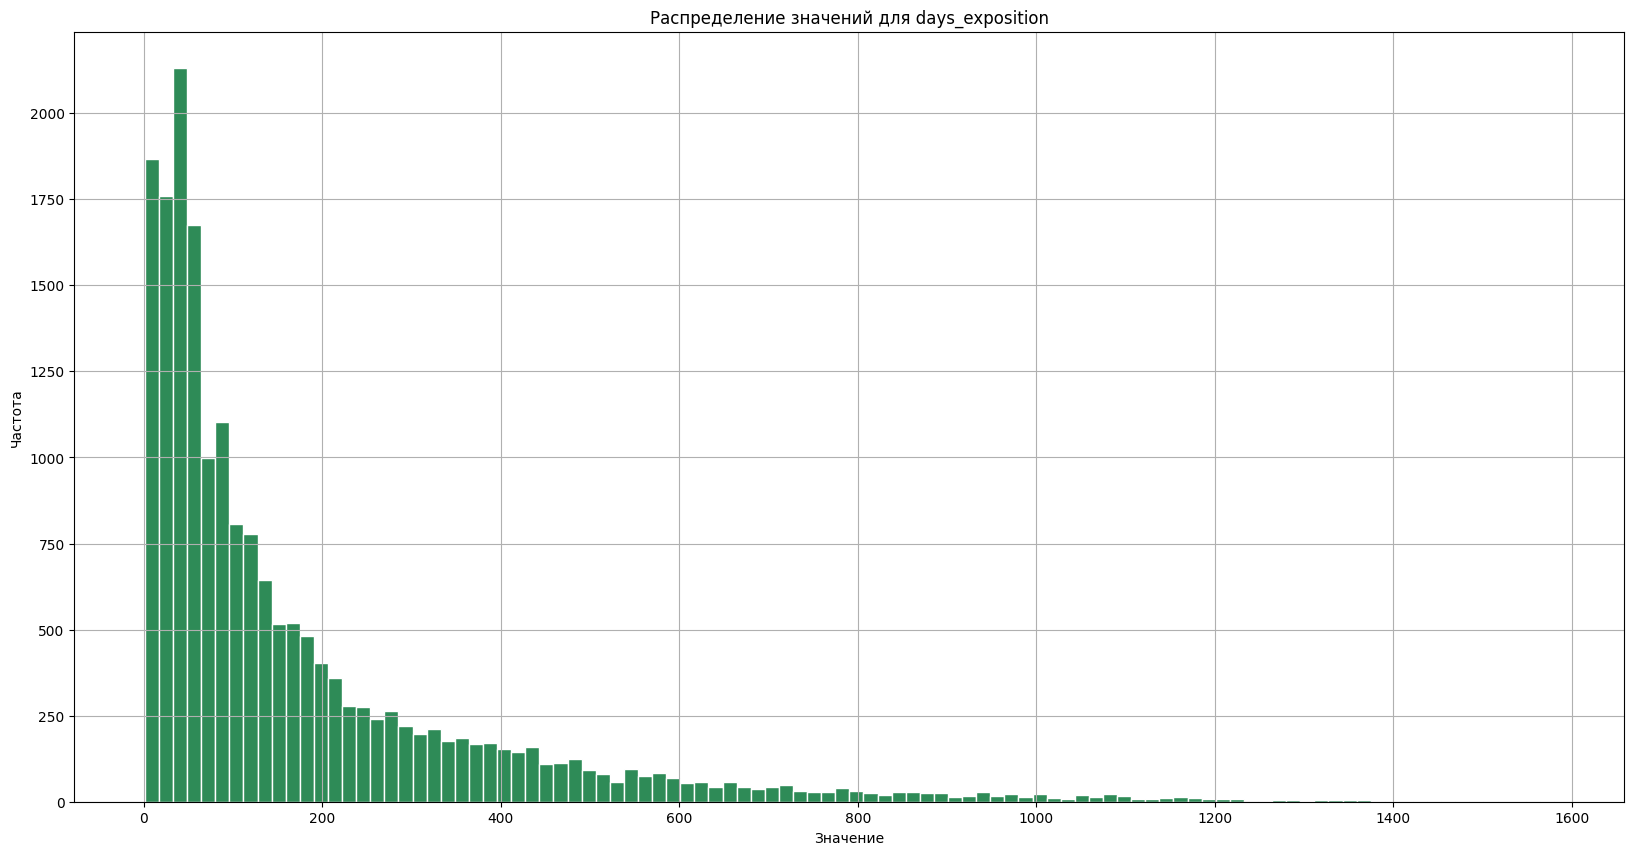

In [128]:
data.days_exposition.hist(figsize=(10,5), bins=100, color='#2E8B57', ec="white")
plt.title('Распределение значений для days_exposition')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()


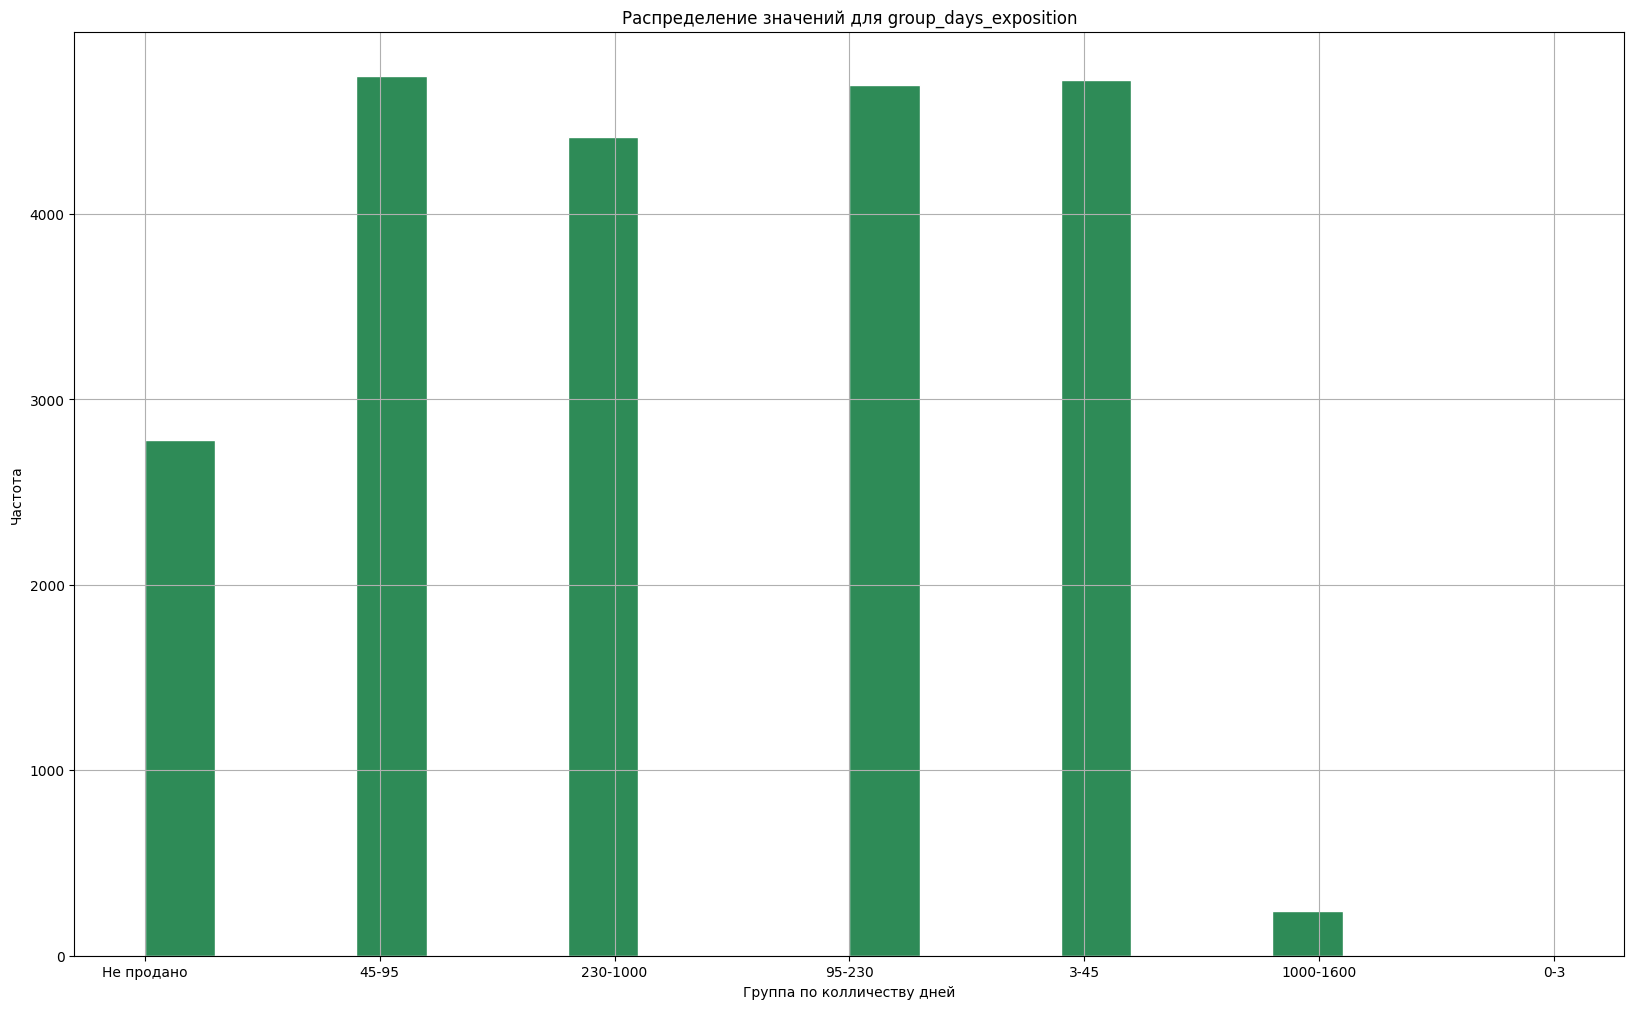

In [129]:
data.group_days_exposition.hist(figsize=(10,5), bins=20, color='#2E8B57', ec="white")
plt.title('Распределение значений для group_days_exposition')
plt.xlabel('Группа по колличеству дней')
plt.ylabel('Частота')
plt.show()


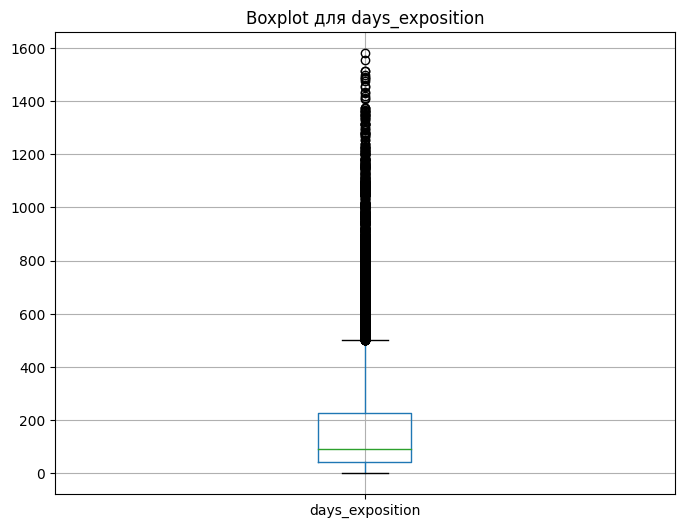

In [130]:
plot_boxplots(data, ['days_exposition'])

In [131]:
data['days_exposition'].describe()

count    18821.000000
mean       177.898199
std        216.391889
min          1.000000
25%         44.000000
50%         93.000000
75%        227.000000
max       1580.000000
Name: days_exposition, dtype: float64

Хотя гистограмма выглядит нормально, ящик показывает достаточно большой выброс значений после 75 %, возможно это связано с тем что объявление забыли снять с публикации. Так же слишком быстрое снятие с публикации может быть результатом мошенничества или же изменение решения о продаже.  
Уберем критические выбросы и посмотрим на ящик еще раз

#### check nan

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21599 entries, 0 to 23698
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_images                  21599 non-null  int64         
 1   last_price                    21599 non-null  float64       
 2   total_area                    21599 non-null  float64       
 3   first_day_exposition          21599 non-null  datetime64[ns]
 4   rooms                         21599 non-null  int64         
 5   ceiling_height                21599 non-null  float64       
 6   floors_total                  21599 non-null  int64         
 7   living_area                   19903 non-null  float64       
 8   floor                         21599 non-null  int64         
 9   is_apartment                  21599 non-null  bool          
 10  studio                        21599 non-null  bool          
 11  open_plan                     215

In [133]:
data['group_days_exposition'].value_counts()

group_days_exposition
45-95         4746
3-45          4722
95-230        4696
230-1000      4413
Не продано    2779
1000-1600      240
0-3              3
Name: count, dtype: int64

In [134]:
data['days_exposition'].quantile(0.99)

1054.7999999999993

In [135]:
data = data[(data['days_exposition'].isna()) | ((data['days_exposition'] > 3) & (data['days_exposition'] < 1100))]

In [136]:
data.shape

(21459, 33)

In [137]:
# check
data['days_exposition'].max()

1099.0

In [138]:
data.shape[0]


21459

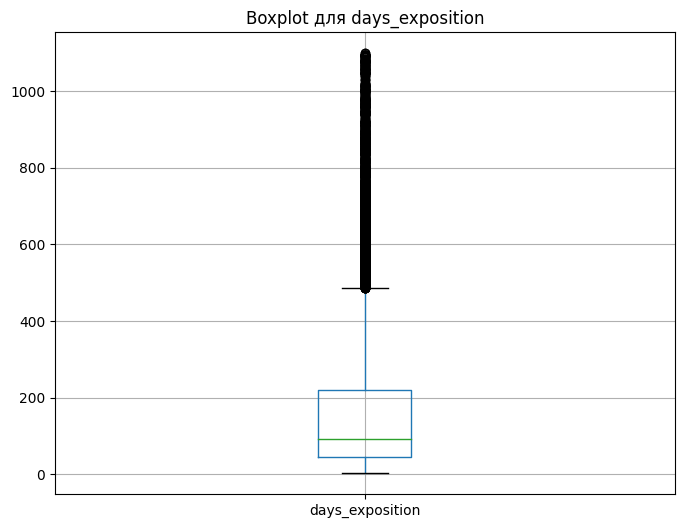

In [139]:
plot_boxplots(data, ['days_exposition'])

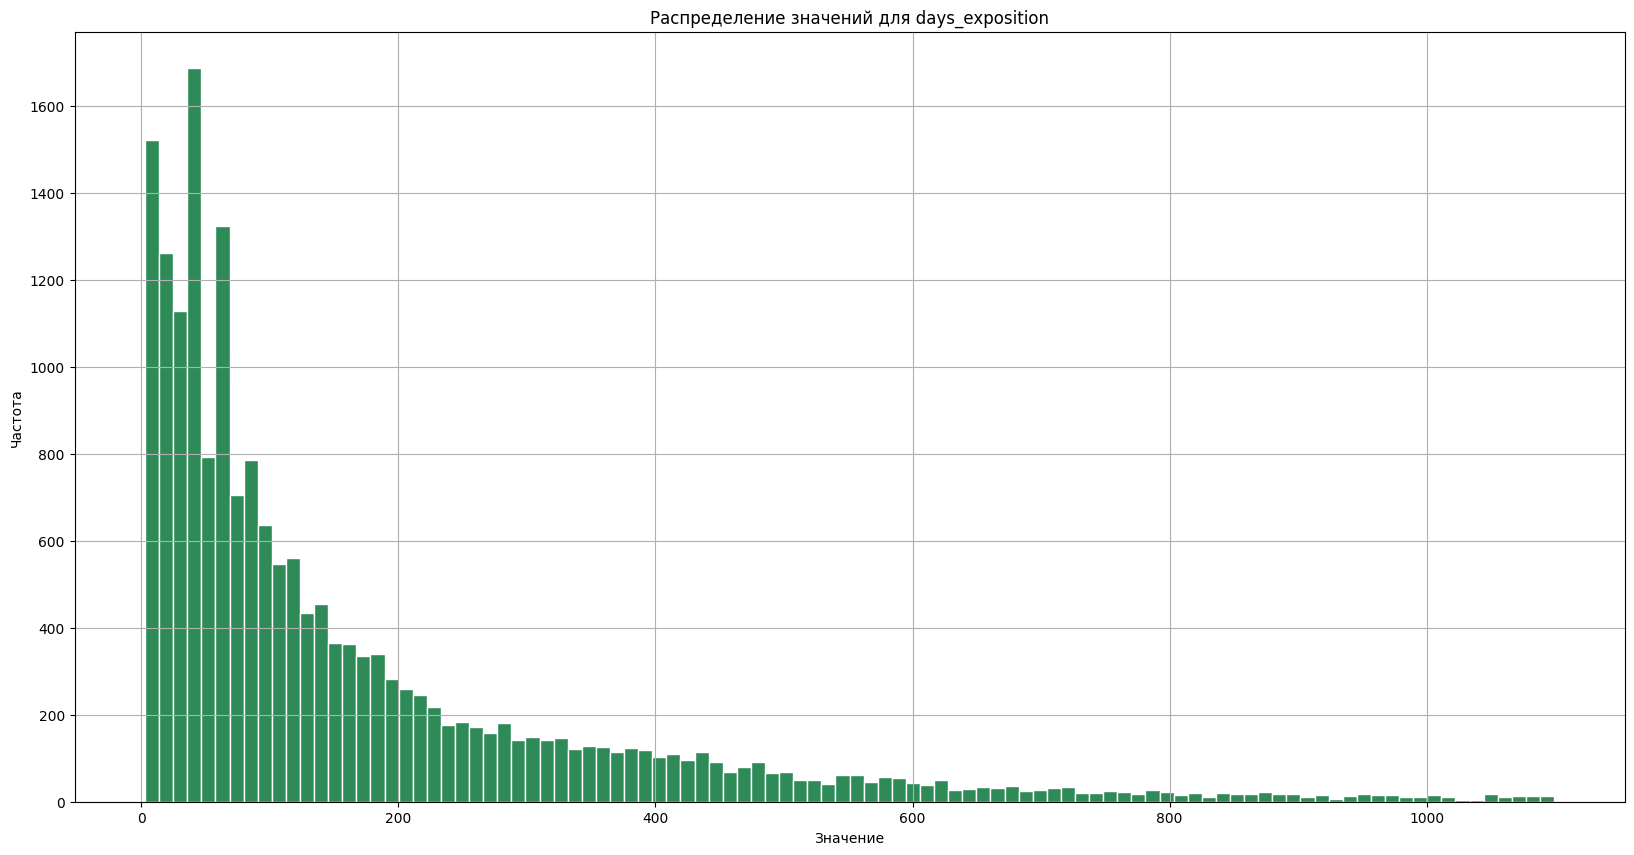

In [140]:
data.days_exposition.hist( figsize=(10,5),  bins=100, color='#2E8B57', ec="white")
plt.title('Распределение значений для days_exposition')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

Гистограмма выглядит нормально

In [141]:
data['days_exposition'].describe()

count    18681.000000
mean       170.096355
std        196.606358
min          3.000000
25%         44.000000
50%         92.000000
75%        221.000000
max       1099.000000
Name: days_exposition, dtype: float64

По данному графику и описанию, продажа занимает в среднем 170 дней, а медианное время составляет 92 дней. Эти показатели более информативны, учитывая большое количество квартир, продававшихся более 221 дней. На графике видно два пика: первый в диапазоне от 5 до 10 дней, что свидетельствует о достаточно быстрой продаже (~1500 квартир), и второй пик выше  примерно с 1650 квартирами в диапазоне от 46 до 60 дней, что ближе к реальному времени продажи квартиры. Быстрые продажи менее чем за 44 дня могут быть реальными для жилого рынка Санкт-Петербурга, но это маловероятно; скорее всего, такие быстрые сделки связаны с мошенничеством или ошибками при внесении данных в объявления, так же имеет влияние снятие с продажи объявлений на 44 и 45 день,которые имеют техническую причину и не используются для анализа. Так и долгие продажи более 221 дней. Было достаточно мого выбросов до 1600 дней, что необычно долго.

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21459 entries, 0 to 23698
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_images                  21459 non-null  int64         
 1   last_price                    21459 non-null  float64       
 2   total_area                    21459 non-null  float64       
 3   first_day_exposition          21459 non-null  datetime64[ns]
 4   rooms                         21459 non-null  int64         
 5   ceiling_height                21459 non-null  float64       
 6   floors_total                  21459 non-null  int64         
 7   living_area                   19773 non-null  float64       
 8   floor                         21459 non-null  int64         
 9   is_apartment                  21459 non-null  bool          
 10  studio                        21459 non-null  bool          
 11  open_plan                     214

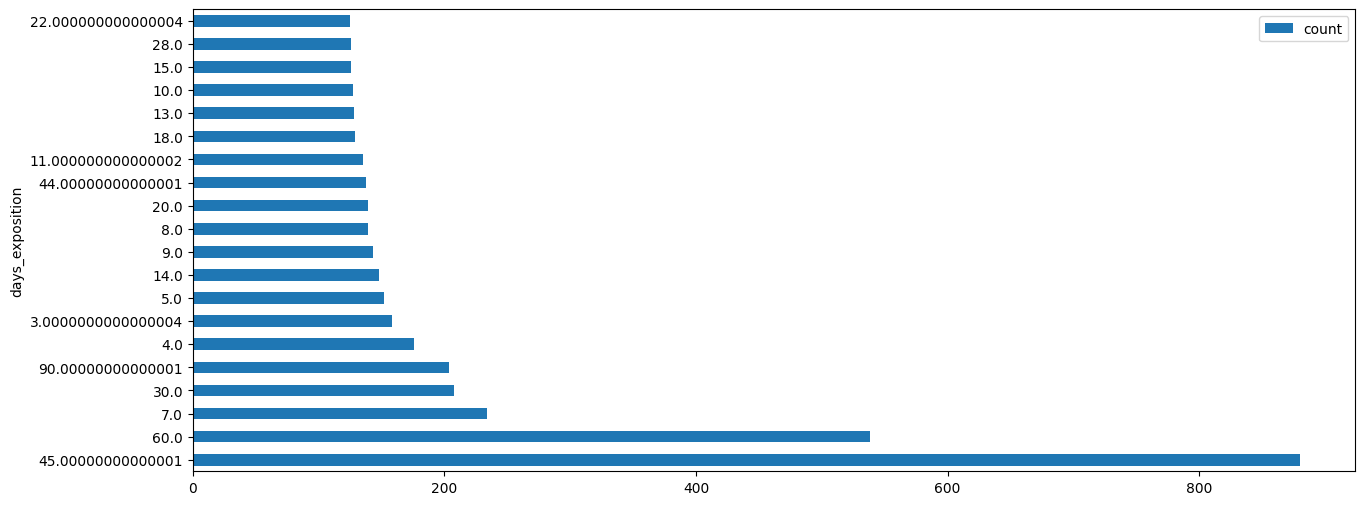

In [143]:
# Моды на сырых данных
df_check['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

Построим график зависимости цены от дней продажи

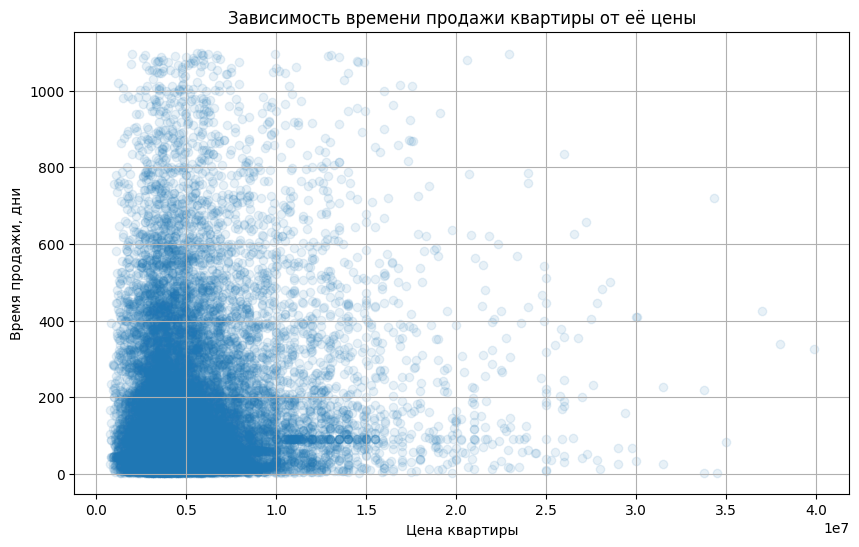

In [144]:
plt.figure(figsize=(10, 6))
plt.scatter(data['last_price'], data['days_exposition'], alpha=0.1)
plt.title('Зависимость времени продажи квартиры от её цены')
plt.xlabel('Цена квартиры')
plt.ylabel('Время продажи, дни')
plt.grid(True)
plt.show()

Какой-то явной зависимости между *last_price и days_exposition* на данном графике нет  

Построем матрицу корреляции по каждому столбцу таблици и посмторим какие значения имеют наибольшую кореляцию

In [145]:
matrix = corr_matrix_data_median(data)
vmin = -1.0
vmax = 0.9

table_corr = (matrix
 .style
 .background_gradient(cmap='coolwarm', vmin=vmin, vmax=vmax)
)
table_corr

##### Промежуточный вывод по матрице корреляции  

* По данным столбцев 'total_area', 'last_price', 'rooms', 'ceiling_height', мы уже выводили таблицу такого типа, но в данном случае нам интересны другие зависимости для last_price. Как видно из таблицы так же видна зависимость роста стоймости от величины living_area и kitchen_area, это ожидаемый результат, ведь у нас есть прямая зависимость от total_area, в которую непосредственно входят значения living_area и kitchen_area.

* Так же есть небольшая отрицательная зависимость km_cityCenters_nearest и cityCenters_nearest от last_price которую следует проверить  

* Еще в данной таблице представленны незначительные зависимости ponds_around3000 и parks_around3000 с last_price

* Это все возожные зависимости в данном dataframe, возможно при дитальном рассмотрении некоторых столбцев и категоризации значений, можно выявить новые закономерности


Создадим линейную диаграмму для столбцев 'first_exposition_year', 'first_exposition_month' , 'days_exposition'

<ipython-input-146-51e3127f09a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sale_date'] = data['first_day_exposition'] + pd.to_timedelta(data['days_exposition'], unit='D')


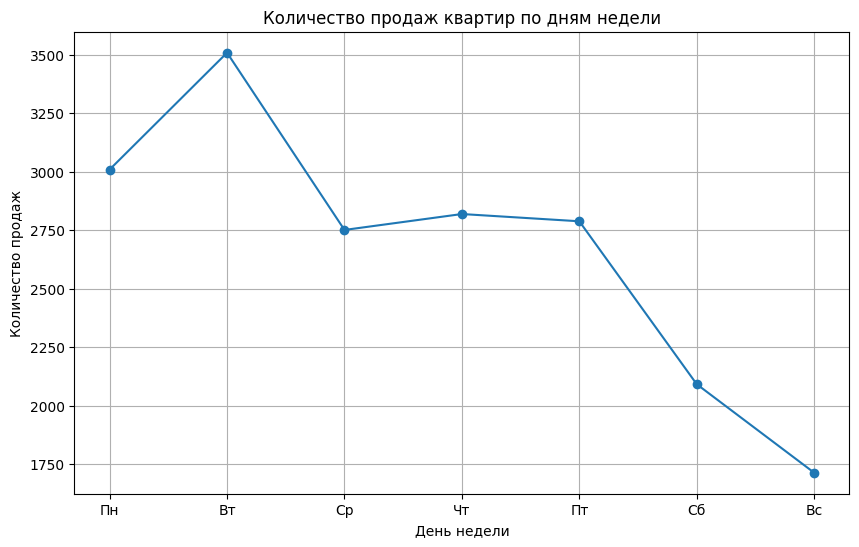

In [146]:
data['sale_date'] = data['first_day_exposition'] + pd.to_timedelta(data['days_exposition'], unit='D')
sales_by_day_of_week = data.groupby(data['sale_date'].dt.dayofweek)['days_exposition'].count()

sales_by_day_of_week.index = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']

sales_by_day_of_week.plot(kind='line', figsize=(10, 6), marker='o', linestyle='-')
plt.title('Количество продаж квартир по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.show()

На данном графике видно, что чаще всего покупают квартиры во вторник

In [147]:
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
5            10   2890000.0        30.4           2018-09-10      1   
6             6   3700000.0        37.3           2017-11-02      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0             2.7            16         51.0      8         False   False   
1             2.6            11         18.6      1         False   False   
2             2.6             5         34.3      4         False   False   
5             2.6            12         14.4      5         False   False   
6             2.6            26         10.6      6         False   False   

   open_plan  kitchen_area  balcony      locality_name  airports_nearest  \
0      False          25.0        0    санкт-петербург           18863.0   
1      False          11.0        2     посёлок шушары           12817.0   
2      False           8.3        0    санкт-петербург           21741.0   
5      False           9.1        0    посёлок янино-1               NaN   
6      False          14.4        1  посёлок парголово           52996.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0                 1          482.0                 2   
1              18603.0                 0            NaN                 0   
2              13933.0                 1           90.0                 2   
5                  NaN                 0            NaN                 0   
6              19143.0                 0            NaN                 0   

   ponds_nearest  days_exposition parks_nearest_category  \
0          755.0              NaN                 близко   
1            NaN             81.0             неизвестно   
2          574.0            558.0           очень близко   
5            NaN             55.0             неизвестно   
6            NaN            155.0             неизвестно   

  ponds_nearest_category distance_group_city group_total_area  \
0      пешая доступность            12-20 км          Премиум   
1             неизвестно            12-20 км          Комфорт   
2      пешая доступность            12-20 км           Бизнес   
5             неизвестно          Неизвестно           Эконом   
6             неизвестно            12-20 км           Эконом   

  group_days_exposition  first_exposition_day_of_week  first_exposition_month  \
0            Не продано                             3                       3   
1                 45-95                             1                      12   
2              230-1000                             3                       8   
5                 45-95                             0                       9   
6                95-230                             3                      11   

   first_exposition_year type_floor  km_cityCenters_nearest  price_per_area  \
0                   2019     другой                    16.0       120370.37   
1                   2018     первый                    19.0        82920.79   
2                   2015     другой                    14.0        92785.71   
5                   2018     другой                     NaN        95065.79   
6                   2017     другой                    19.0        99195.71   

   sale_date  
0        NaT  
1 2019-02-23  
2 2017-02-28  
5 2018-11-04  
6 2018-04-06

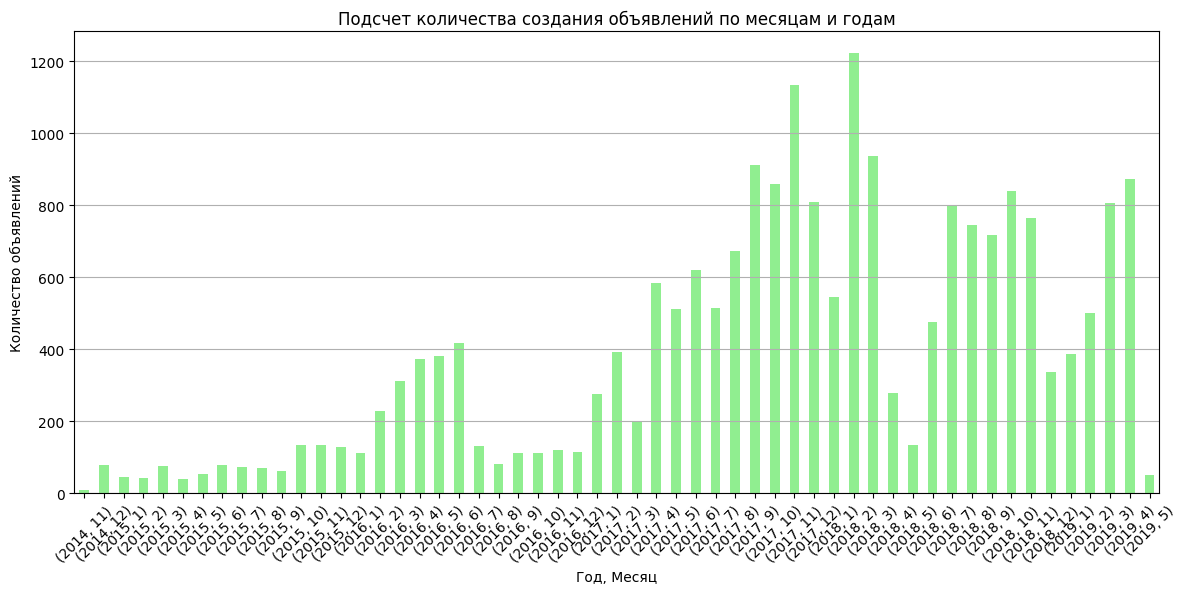

In [148]:
sales_by_month_year = data.groupby(['first_exposition_year', 'first_exposition_month'])['first_exposition_year'].count()

sales_by_month_year.plot(kind='bar', figsize=(14, 6), color='lightgreen')
plt.title('Подсчет количества создания объявлений по месяцам и годам')
plt.xlabel('Год, Месяц')
plt.ylabel('Количество объявлений')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

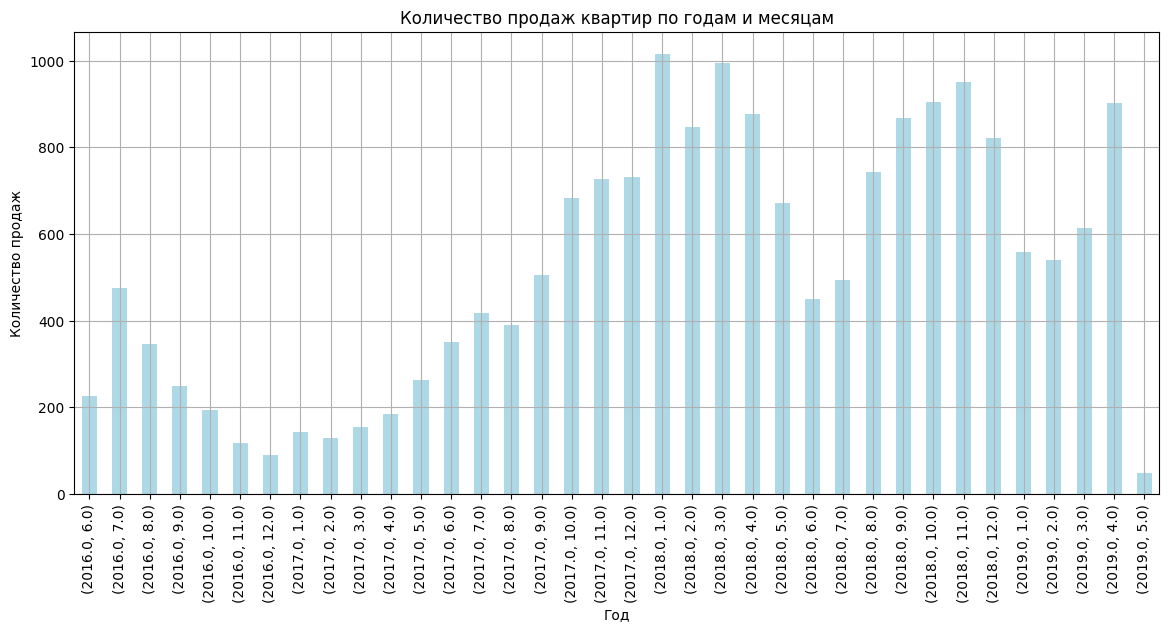

In [149]:
# # Группировка данных по месяцам и годам продажи квартиры
sales_by_year = data.groupby([data['sale_date'].dt.year, data['sale_date'].dt.month])['sale_date'].count()

# Построение графика по годам
sales_by_year.plot(kind='bar', figsize=(14, 6), color='lightblue')
plt.title('Количество продаж квартир по годам и месяцам')
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.show()

Хотя первые объявления в наших данных были выложены в 2014 году первые продажи наступили в 2016, конечно можно предположить это связано с относительно недавним на тот момент созданием этого сервиса ( по данным википедии был запущен в 2010 году), или же особенностью нашей выборки. Пик новых объявлений был в январе 2018 года, пик продаж был так же в 2018 году в январе.

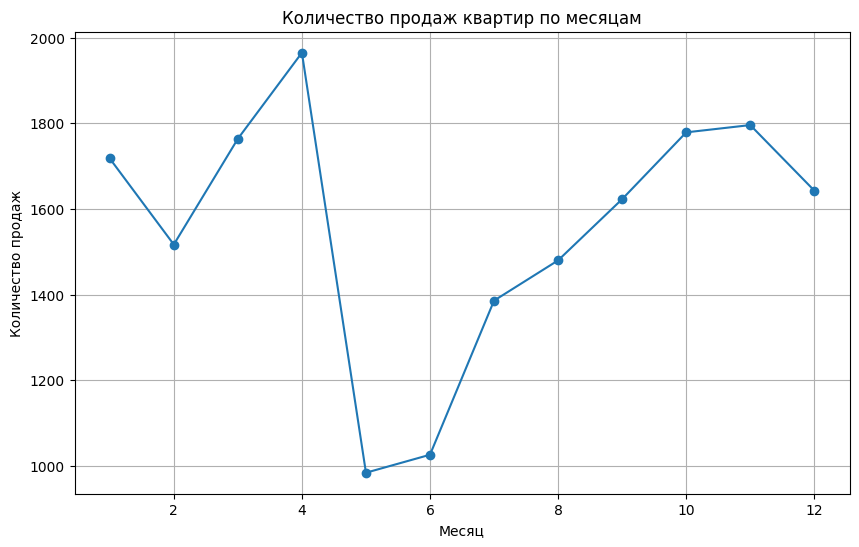

In [150]:
sales_by_month = data.groupby(data['sale_date'].dt.month)['days_exposition'].count()

sales_by_month.plot(kind='line', figsize=(10, 6), marker='o', linestyle='-')
plt.title('Количество продаж квартир по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.show()

На даном графике видно что пик продаж находится в апреле а затем резкий спад в мае, возможно это связано с особенностью данных

##### Вывод по анализу времени размещения

На графиках видно, что:
* Чаще всего покупают квартиры во вторник.
* Первые продажи после размещения объявлений произошли с некоторой задержкой, что может быть связано как с начальной активизацией пользователей после создания сервиса, так и с особенностями выборки.
* Пик новых объявлений и пик продаж в январе 2018 года  могут указывать на определенные сезонные или рыночные тенденции. Например, январь может быть периодом активизации продавцов после новогодних праздников, когда они принимают решение о продаже недвижимости. Апрель, возможно, является периодом увеличенного спроса на недвижимость, что приводит к увеличению числа сделок.

#### Определение факторов, которые больше всего влияют на общую стоимость объекта

Построим графики, которые показывают зависимость цены от параметров


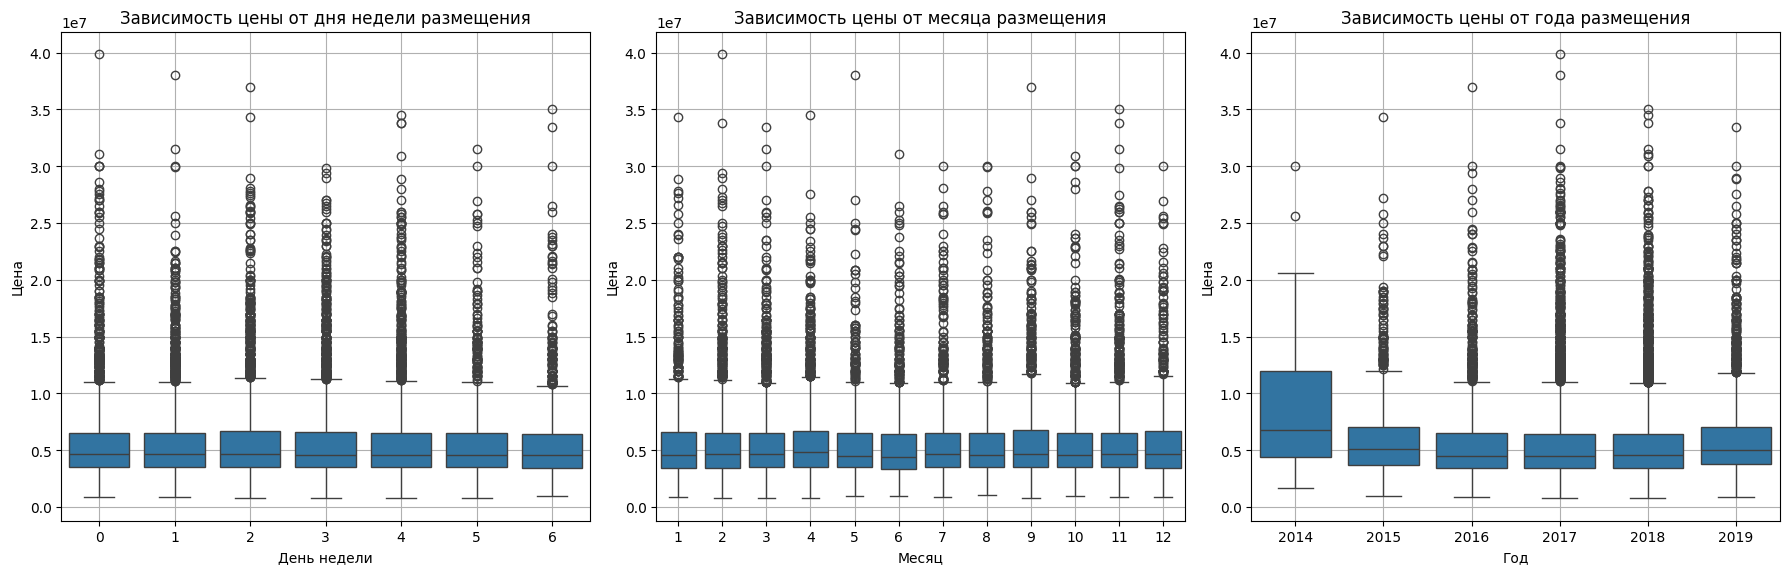

Средняя цена по годам:
                         last_price
first_exposition_year              
2014                   8.705295e+06
2015                   6.144233e+06
2019                   5.934733e+06
2016                   5.571273e+06
2017                   5.488162e+06
2018                   5.483803e+06

Средняя площадь по годам:
                       total_area
first_exposition_year            
2014                    75.822472
2015                    62.843803
2016                    58.310544
2017                    56.835039
2019                    56.278357
2018                    55.666747

Количество объявлений о продаже по годам:
                       last_price
first_exposition_year            
2018                         7807
2017                         7497
2019                         2623
2016                         2499
2015                          944
2014                           89


In [151]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='first_exposition_day_of_week', y='last_price', data=data)
plt.title('Зависимость цены от дня недели размещения')
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.grid(True)

plt.subplot(1, 3, 2)
sns.boxplot(x='first_exposition_month', y='last_price', data=data)
plt.title('Зависимость цены от месяца размещения')
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.grid(True)

plt.subplot(1, 3, 3)
sns.boxplot(x='first_exposition_year', y='last_price', data=data)
plt.title('Зависимость цены от года размещения')
plt.xlabel('Год')
plt.ylabel('Цена')
plt.grid(True)

plt.tight_layout()
plt.show()

pivot_table_price = data.pivot_table(index='first_exposition_year', values='last_price', aggfunc='mean').sort_values(by='last_price',ascending=False)
pivot_table_area = data.pivot_table(index='first_exposition_year', values='total_area', aggfunc='mean').sort_values(by='total_area',ascending=False)
pivot_table_count = data.pivot_table(index='first_exposition_year', values='last_price', aggfunc='count').sort_values(by='last_price',ascending=False)

print("Средняя цена по годам:")
print(pivot_table_price)
print("\nСредняя площадь по годам:")
print(pivot_table_area)
print("\nКоличество объявлений о продаже по годам:")
print(pivot_table_count)

На данных графиках не наблюдается явной зависимости цены от даты размещения. Основываясь на сводной таблице средней цены по годам, самая высокая средняя цена была в 2014 году, так же как и средняя площадь по годам, но колличество объявлений в 2014 году было критически мало, по сравнению с последующими годами. В 2017 году больше всего объявлений о продажи.

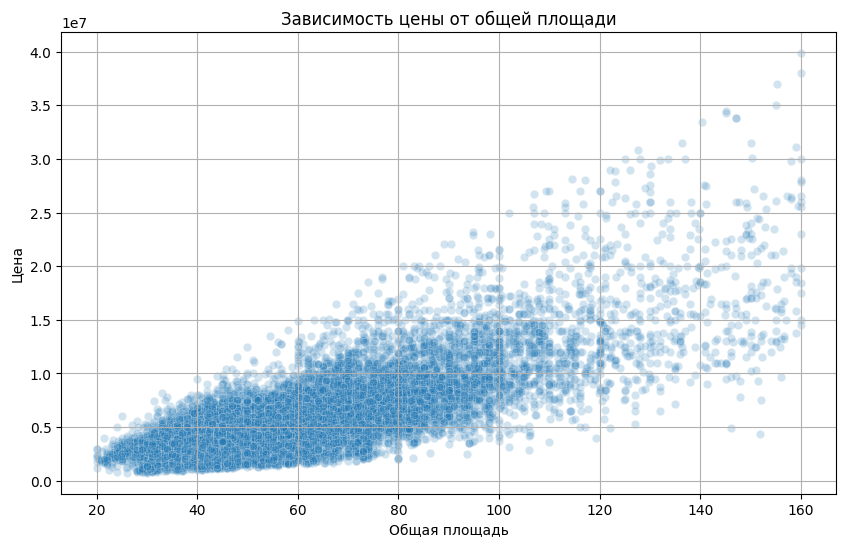

In [152]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_area', y='last_price', data=data, alpha=0.2 )
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.grid(True)
plt.show()


График показывает сильную прямую зависимость цены от общей площади квартиры, что ожидаемо: чем больше площадь, тем выше цена

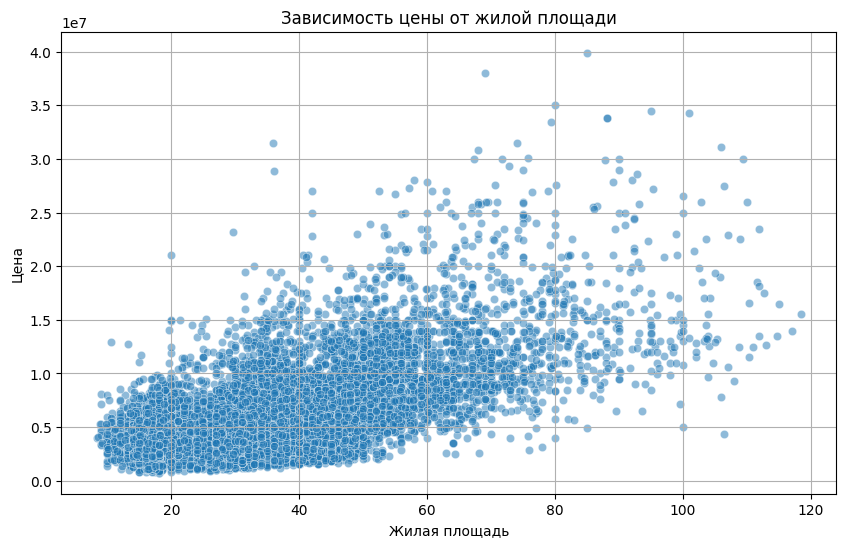

In [153]:
# График зависимости цены от жилой площади
plt.figure(figsize=(10, 6))
sns.scatterplot(x='living_area', y='last_price', data=data, alpha=0.5)
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.grid(True)
plt.show()

На графике прослеживается средняя прямая зависимость цены от жилой площади. Это также логично, так как жилая площадь является важным фактором при определении цены квартиры.

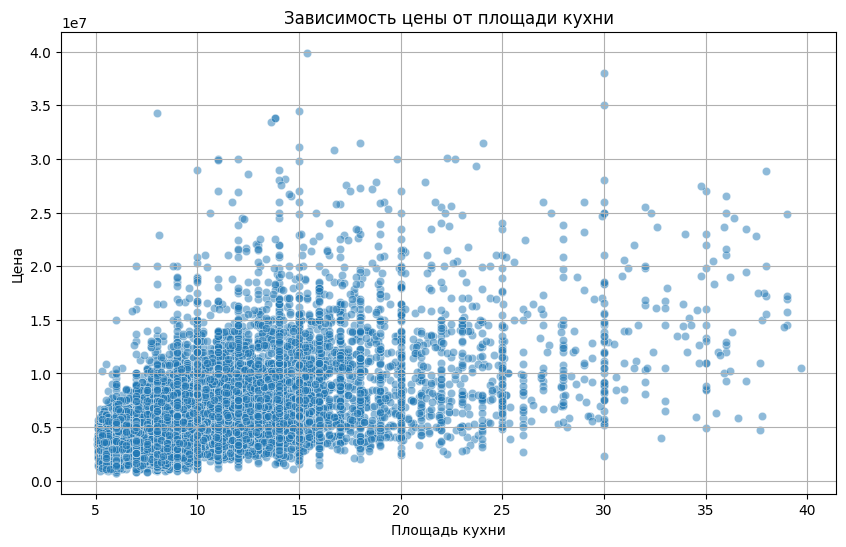

In [154]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kitchen_area', y='last_price', data=data, alpha=0.5 )
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена')
plt.grid(True)
plt.show()

Наблюдается слабая прямая зависимость цены от площади кухни. Это может быть связано с тем, что большая кухня может быть привлекательной для покупателей, но цена не всегда линейно зависит от этого параметра.

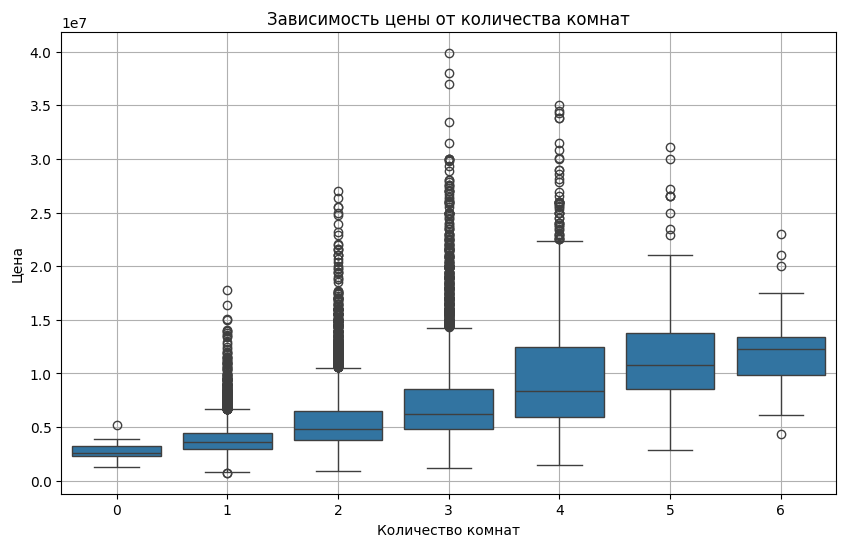

In [155]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rooms', y='last_price', data=data)
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.grid(True)
plt.show()


На графике видно, что с увеличением количества комнат в квартире цена также возрастает, что подтверждает прямую зависимость этих параметров.

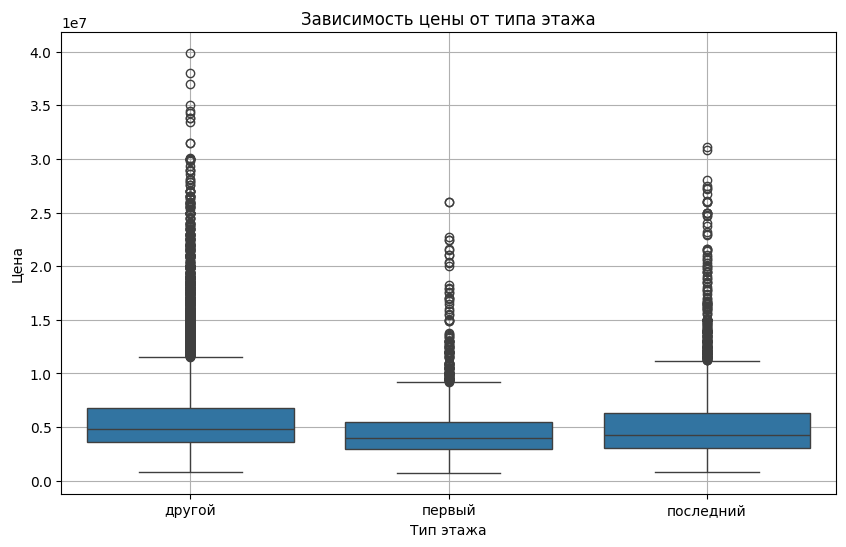

In [156]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type_floor', y='last_price', data=data)
plt.title('Зависимость цены от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цена')
plt.grid(True)
plt.show()

 По графику не наблюдается значительной зависимости цены от типа этажа, однако стоит отметить, что квартиры на первом этаже в среднем имеют более низкую цену по сравнению с другими этажами

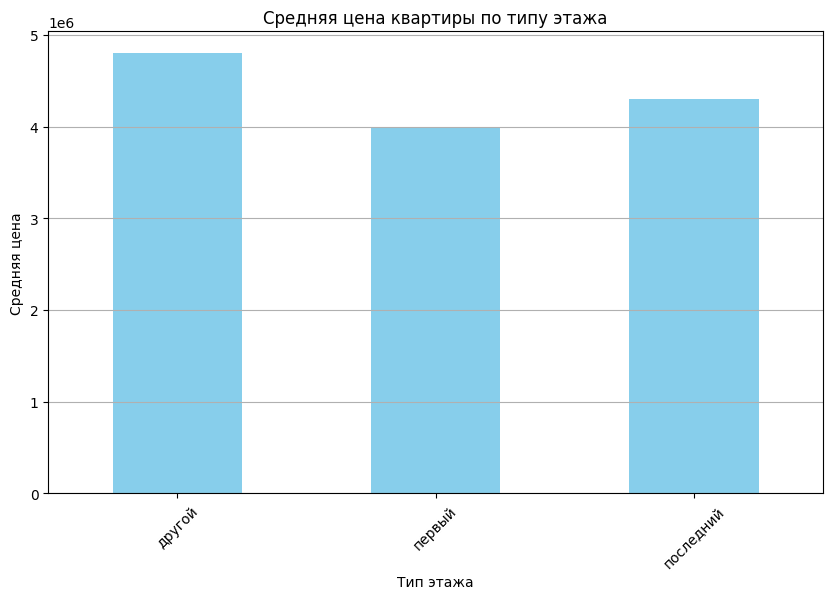

In [157]:
med_floor_type = data.groupby('type_floor')['last_price'].median()

plt.figure(figsize=(10, 6))
med_floor_type.plot(kind='bar', color='skyblue')
plt.title('Средняя цена квартиры по типу этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Средняя цена')
# Поворот подписей по оси X для лучшей читаемости
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

На данном графике тип этажа "первый" показывает самую низкую медианную стоимость (менее 5 млн), другие же типы находятся в близком диапазоне, по этому делаем вывод, что имеется незначительное влияние на стоимость нахождение квартиры на первом этаже.

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21459 entries, 0 to 23698
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_images                  21459 non-null  int64         
 1   last_price                    21459 non-null  float64       
 2   total_area                    21459 non-null  float64       
 3   first_day_exposition          21459 non-null  datetime64[ns]
 4   rooms                         21459 non-null  int64         
 5   ceiling_height                21459 non-null  float64       
 6   floors_total                  21459 non-null  int64         
 7   living_area                   19773 non-null  float64       
 8   floor                         21459 non-null  int64         
 9   is_apartment                  21459 non-null  bool          
 10  studio                        21459 non-null  bool          
 11  open_plan                     214

#### check

                   counts  mean_price_per_area
locality_name                                 
санкт-петербург     14430               109218
пушкин                321               103158
деревня кудрово       291                92353
посёлок парголово     321                90261
посёлок мурино        521                85079
посёлок шушары        426                78351
колпино               326                75394
гатчина               276                69862
всеволожск            383                67157
выборг                216                58638


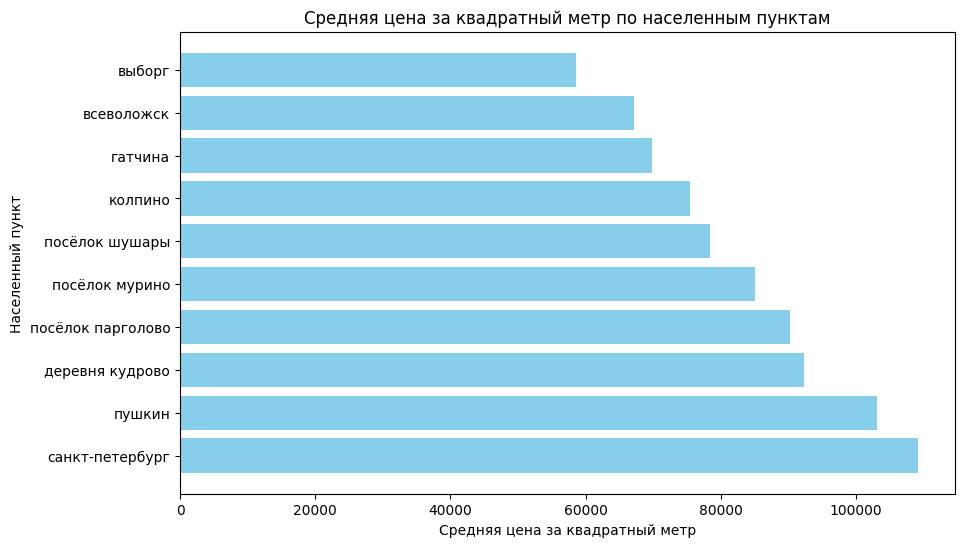

In [159]:
localities = data['locality_name'].value_counts()

top_10_local = localities.head(10).index

data_top_10 = data[data['locality_name'].isin(top_10_local)]
mean_price = data_top_10.pivot_table(index='locality_name',
                                      values=['price_per_area'],
                                      aggfunc={'price_per_area': 'mean', 'locality_name': 'size'})

mean_price.columns = ['counts', 'mean_price_per_area']

mean_price_sorted = mean_price.sort_values(by='mean_price_per_area', ascending=False).astype(int)
print(mean_price_sorted)

plt.figure(figsize=(10, 6))
plt.barh(mean_price_sorted.index, mean_price_sorted['mean_price_per_area'], color='skyblue')
plt.title('Средняя цена за квадратный метр по населенным пунктам')
plt.xlabel('Средняя цена за квадратный метр')
plt.ylabel('Населенный пункт')

plt.show()

> Населённый пункт с самой высокой средней ценой квадратного метра: санкт-петербург.

> Населённый пункт с самой низкой средней ценой квадратного метра в топе 10: Выборг.

Ожидаемо, что в Санкт-Петербурге больше всего объявлений в наших данных, а так же самая высокая средняя цена за квадратный метр в топ -10 городов по колличеству объявлений   

Поскольку в '*cityCenters_nearest*' много выбрасов на растоянии от 25 км до 60 удалим эти данные и посмотрим на график без влияния этих данных

In [160]:
data_cityCenters_nearest = data.copy()
data_cityCenters_nearest = data[data['cityCenters_nearest'] < 25000]

In [161]:
data['cityCenters_nearest'].describe()

count    16522.000000
mean     14070.201549
std       7606.209063
min        181.000000
25%       9816.000000
50%      13235.000000
75%      16266.000000
max      49984.000000
Name: cityCenters_nearest, dtype: float64

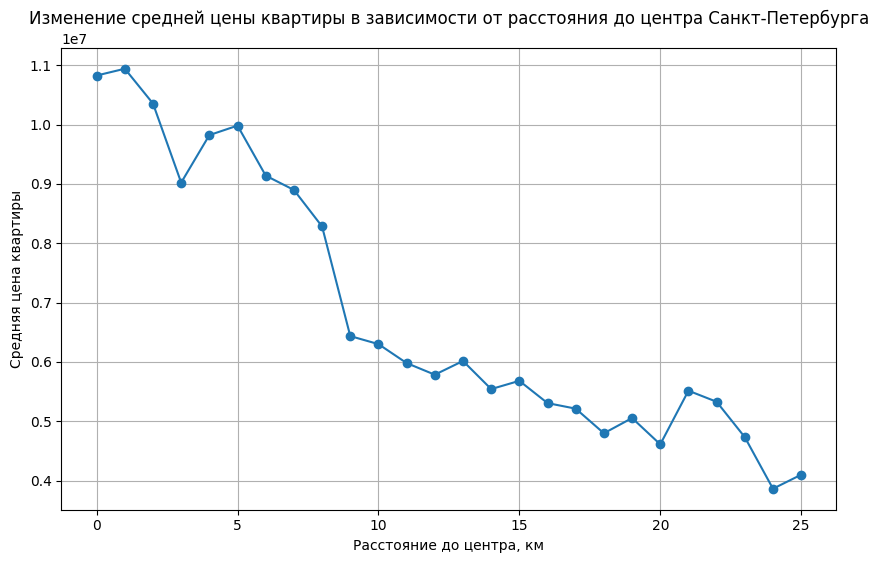

In [162]:
spb_flats = data_cityCenters_nearest[data_cityCenters_nearest['locality_name'] == 'санкт-петербург']
distance_groups = spb_flats.groupby('km_cityCenters_nearest')
mean_prices_by_distance = distance_groups['last_price'].mean()
plt.figure(figsize=(10, 6))
mean_prices_by_distance.plot(marker='o', linestyle='-')
plt.title('Изменение средней цены квартиры в зависимости от расстояния до центра Санкт-Петербурга')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Средняя цена квартиры')
plt.grid(True)
plt.show()

Данный график показывает, что с ростом растояния от центра уменьшается цена за квадратный метр

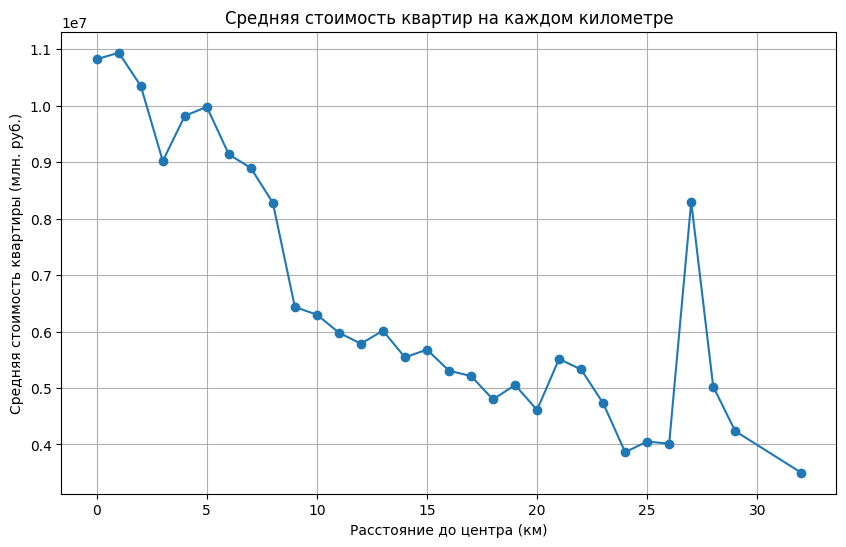

In [163]:
mean_price = data[data['locality_name'] == 'санкт-петербург'].groupby('km_cityCenters_nearest')['last_price'].mean()

plt.figure(figsize=(10, 6))
plt.plot(mean_price.index, mean_price.values, marker='o', linestyle='-')
plt.title('Средняя стоимость квартир на каждом километре')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя стоимость квартиры (млн. руб.)')
plt.grid(True)
plt.show()

Судя по графику, в целом наблюдается уменьшение стоимости объектов недвижимости с увеличением расстояния от центра города. Однако на расстоянии от 25 до 30 км от центра города наблюдается некоторое увеличение средней стоимости, которая оказывается на уровне примерно 5 км от центра.

Это может быть объяснено наличием в выборке данных о маленьких населенных пунктах с небольшим количеством объявлений. В таких населенных пунктах стоимость недвижимости может быть достаточно высокой из-за специфических факторов, таких как эксклюзивное расположение или особенности жилья. Однако, из-за маленького размера выборки, точность оценки средней стоимости квартир может быть невысокой, что может привести к неточным результатам.

##### Вывод о влияние различных параметров на цену

Цена квартиры зависит от таких параметров, как общая площадь, количество комнат, тип этажа и расстояние до центра города. Эти параметры могут быть важными факторами при определении рыночной стоимости квартиры, и их следует учитывать при анализе и принятии решений о покупке или продаже недвижимости.

### Общий вывод

Цель проекта - определить зависимость стоимости квартиры от разных параметров для определения рыночной стоимости жилья на основе данных сервиса Яндекс Недвижимость, была достигнута благодаря обширному анализу данных и выявлению факторов, влияющих на цену недвижимости.

1. Подготовка данных:
   - На этом этапе были обнаружены и обработаны пропущенные значения, а также установлен корректный тип данных для каждого столбца. Неявные дубликаты в названиях населённых пунктов были также устранены. Редкие и выбивающиеся значения были обработаны для повышения качества данных. Были категоризированные данные с большими пропусками, значения которых нельзя было заменить.

2. Добавление новых параметров:
   - В ходе анализа были введены дополнительные параметры, такие как цена за квадратный метр, день, месяц и год публикации объявления, тип этажа квартиры и расстояние до центра города в километрах.

3. Изучение и описание параметров:
   - Были изучены и описаны основные параметры недвижимости, такие как общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков и другие.
   
4. Анализ данных по параметрам 'total_area', 'last_price', 'rooms' и 'ceiling_height' позволил выявить следующие ключевые выводы:
   - Обнаружена явная положительная корреляция между ценой недвижимости ('last_price') и ее общей площадью ('total_area'). Чем больше площадь квартиры, тем выше ее цена. Это подтверждает высокий коэффициент корреляции между этими параметрами.
   - Есть также некоторая положительная корреляция между количеством комнат ('rooms') и ценой недвижимости. Чем больше комнат в квартире, тем выше ее цена, хотя эта зависимость не так явно выражена.
   - Наблюдается слабая положительная корреляция между высотой потолков ('ceiling_height') и ценой недвижимости. Это означает, что более высокие потолки могут повысить стоимость квартиры, но влияние этого параметра на цену недвижимости не такое значительное, как общая площадь или количество комнат.
   
5. Анализ времени продажи квартир показал, что большинство сделок происходит в течение 60 дней. Однако есть и редкие случаи быстрых продаж меньше чем за 40 дней, а также долгих продаж, продолжительностью от 221 дней до нескольких лет.
    -  Последующий анализ времени публикации объявлений позволил выявить сезонные и рыночные тенденции. Например, пик новых объявлений приходится на январь 2018 года. Это может указывать на определенные рыночные особенности или сезонные колебания спроса и предложения.

7. Вычисление средней цены за квадратный метр:
    - Населённый пункт с самой высокой средней ценой квадратного метра: Санкт-Петербург  
    - Населённый пункт с самой низкой средней ценой квадратного метра в топе 10: Выборг
    - Определена средняя цена одного квадратного метра для 10 населённых пунктов с наибольшим числом объявлений.
    - Стоит отметить, что средняя цена за квадратный метр в Санкт-Петербурге выше, чем в остальных населенных пунктах из топ-10, что логично из-за его статуса крупного города.
   
8. Определение факторов, влияющих на общую стоимость объекта:
   - Проведен анализ зависимости цены недвижимости от таких параметров, как общая площадь, количество комнат, тип этажа и расстояние до центра города. Эти параметры могут быть важными факторами при определении рыночной стоимости квартиры, и их следует учитывать при анализе и принятии решений о покупке или продаже недвижимости. Когда мы говорим о зависимости цены от параметров квартиры, видно, что площадь играет ключевую роль: чем больше площадь, тем выше цена. Это соответствует ожиданиям.
   
9. Анализ средней цены по годам:
    - Исходя из сводной таблицы средней цены по годам, можно заметить, что самая высокая средняя цена была зафиксирована в 2014 году. Однако стоит отметить, что количество объявлений в 2014 году было критически мало по сравнению с последующими годами. В 2017 году было зарегистрировано наибольшее количество объявлений о продаже.
   

10. Анализ стоимости недвижимости в зависимости от расстояния до центра Санкт-Петербурга :
    - Проведен анализ средней стоимости квартир в Санкт-Петербурге в зависимости от удаления от центра города. Установлено, что с ростом расстояния от центра города цена за квадратный метр снижается. Однако на расстоянии от 25 до 30 км от центра города наблюдается некоторое увеличение средней стоимости, которая оказывается на уровне примерно 5 км от центра. Это может быть объяснено наличием в выборке данных о маленьких населенных пунктах с небольшим количеством объявлений. В таких населенных пунктах стоимость недвижимости может быть достаточно высокой из-за специфических факторов, таких как эксклюзивное расположение или особенности жилья. Однако, из-за маленького размера выборки, точность оценки средней стоимости квартир может быть невысокой, что может привести к неточным результатам.

   
Обобщая выводы, можно сказать, что проведенный анализ данных позволил выявить основные факторы, влияющие на цену недвижимости, и понять динамику рынка недвижимости в Санкт-Петербурге. Данные выводы могут быть использованы для определения рыночной стоимости недвижимости, выявления аномалий и мошеннической деятельности, а также для принятия обоснованных решений в сфере недвижимости.